<a href="https://colab.research.google.com/github/yqazw/GreatLearning-Capstone/blob/master/Capstone_Diabetes_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # for connection with your local drive(Google Drive)

In [2]:
drive.mount('/content/drive') # Path setting

Mounted at /content/drive


In [3]:
import pandas as pd

# Because we have more no of rows and columns so we set the option for desplying more no of rows
pd.set_option('max_columns',None)
pd.set_option('max_rows',65)

In [5]:
# Setting Address
import os
os.chdir('/content/drive/My Drive/Capstone') # for fetching the data we require the path

In [6]:
import numpy as np # For Mathmatical 
import pandas as pd # For sructure the Datasets

import matplotlib.pyplot as plt # Plots and Visualization
import seaborn as sns # Plots and Visualization

%matplotlib inline 
plt.rcParams["figure.figsize"] = [15,8] # Setting figure size default

## Data Description :

Acetohexamide is a first-generation sulfonylurea medication used to treat diabetes mellitus type 2, particularly in people whose diabetes cannot be controlled by diet alone.

Glipizide, sold under the brand name Glucotrol among others, is an anti-diabetic medication of the sulfonylurea class used to treat type 2 diabetes

Glyburide is a diabetes medicine used to help control blood sugar levels and treat type 2 diabetes.

Tolbutamide is a first-generation potassium channel blocker, sulfonylurea oral hypoglycemic medication. This drug may be used in the management of type 2 diabetes if diet alone is not effective.

Pioglitazone is a diabetes drug (thiazolidinedione-type, also called "glitazones") used along with a proper diet and exercise program to control high blood sugar in patients with type 2 diabetes.

Rosiglitazone is an insulin sensitizing agent and thiazolidinedione that is indicated for the treatment of type 2 diabetes.

Acarbose is an anti-diabetic drug used to treat diabetes mellitus type 2 and, in some countries, prediabetes.

Miglitol is an oral anti-diabetic drug that acts by inhibiting the ability of the patient to break down complex carbohydrates into glucose.

Troglitazone is an antidiabetic and anti-inflammatory drug, and a member of the drug class of the thiazolidinediones. It was prescribed for people with diabetes mellitus type 2.

Tolazamide is an oral blood glucose lowering drug used for people with Type 2 diabetes. It is part of the sulfonylurea family.

citoglipton (sitagliptin) - Sitagliptin is a diabetes drug that works by increasing levels of natural substances called incretins. Incretins help to control blood sugar by increasing insulin release, especially after a meal. They also decrease the amount of sugar your liver makes.
 
glipizide-metformin - The combination of glyburide and metformin is used to treat type 2 diabetes (condition in     which the body does not use insulin normally and therefore cannot control the amount of sugar in the blood) in     people whose diabetes cannot be controlled by diet and exercise alone.

glipizide-metformin - Glipizide and Metformin combination is used to treat high blood sugar levels that are caused by a type of diabetes mellitus or sugar diabetes called type 2 diabetes

glimepiride-pioglitazone - Pioglitazone and glimepiride combination is used with proper diet and exercise to treat high blood sugar levels caused by type 2 diabetes. Pioglitazone works by helping your body use insulin better. Glimepiride stimulates the release of insulin from the pancreas which will help your body turn food into energy

metformin-rosiglitazone - Rosiglitazone and metformin combination is used to treat a type of diabetes mellitus called type 2 diabetes. It is used together with a proper diet and exercise to help control blood sugar levels.

metformin-pioglitazone - Metformin/pioglitazone is used to improve blood sugar control in adults with type 2 diabetes. It's used along with diet and exercise. Metformin/pioglitazone isn't used to treat type 1 diabetes.

Readmitted : Whether the Patient was Readmitted or not OR whether the Patient was readmitted within 30 days or not.

In [7]:
# Reading Data
data = pd.read_csv('diabetic_data.csv')

In [9]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
data.shape

(101766, 50)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [58]:
data1 = data.loc[:,["encounter_id","patient_nbr","race","gender","age","weight","admission_type_id","discharge_disposition_id","admission_source_id",
                           "time_in_hospital","readmitted"]]

data2 = data[['readmitted']].join(data.iloc[:,10:22])

data3 = data.loc[:,['max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','readmitted']]

data4 = data.loc[:,['acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone',
                    'acarbose','miglitol','troglitazone','tolazamide','readmitted']]

data5 = data.iloc[:,[39,40,41,42,43,44,45,46,47,48,49]]

In [17]:
data1_num = data1.select_dtypes(include = [np.number]) # Numerical columns
data1_cat = data1.select_dtypes(include=[np.object]) # Catagorical columns

# **Univariate Analaysis**

In [18]:
################admission_type_id####################

In [19]:
# Missing values identifiction (Invalid missing values)
print(round((data1_num.admission_type_id[data1_num.admission_type_id == "?"].count()/len(data1_num.admission_type_id))*100,2),\
      " percent missing values are there in admission_type_id column.")

0.0  percent missing values are there in admission_type_id column.


In [20]:
## 6-->Null
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 6].count()/len(data1_num.admission_type_id))*100,2),\
      " percent missing values are there in admission_type_id column assigned as 6 in column.")

5.2  percent missing values are there in admission_type_id column assigned as 6 in column.


In [22]:
## 5-->Not available
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 5].count()/len(data1_num.admission_type_id))*100,2),\
      " percent patients assigned as Not Avaialable")

4.7  percent patients assigned as Not Avaialable


In [23]:
## 8-->Not mapped
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 8].count()/len(data1_num.admission_type_id))*100,2),\
      " percent patient are assigned as Not Mapped(Hospitals wont assign type of admission).")

0.31  percent patient are assigned as Not Mapped(Hospitals wont assign type of admission).


In [24]:
################discharge_disposition_id###################

In [25]:
data1_num.discharge_disposition_id.describe(include = "all")

count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64

In [27]:
## 18--> Null
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 18].count()," is the count of missing values")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 18].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent missing values in discharge_disposition_id column assigned as 18 in column.")

3691  is the count of missing values
3.63  percent missing values in discharge_disposition_id column assigned as 18 in column.


In [28]:
## 25 -->Not Mapped
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 25].count()," are the patients wont fill the Discharge reason")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 25].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent of total data.")

989  are the patients wont fill the Discharge reason
0.97  percent of total data.


In [29]:
## 26 -->Unknown/Invalid
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 26].count()," is the count of missing values")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 26].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent missing values are there in discharge_disposition_id column assigned as 26 in column.")

0  is the count of missing values
0.0  percent missing values are there in discharge_disposition_id column assigned as 26 in column.


In [30]:
data1_num.discharge_disposition_id.value_counts().sort_values(ascending = False)

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [31]:
##############admission_source_id####################
data1_num.admission_source_id.describe(include = "all")

count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64

In [32]:
# Invalid Null values Indentification
data1_num.isnull().sum()

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
dtype: int64

In [33]:
## 17--> Null
print(data1_num.admission_source_id[data1_num.admission_source_id == 17].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 17].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 17 in column.")

6781  is the count of missing values
6.66  percent missing values are there in admission_source_id column assigned as 17 in column.


In [34]:
## 20 -->Not Mapped
print(data1_num.admission_source_id[data1_num.admission_source_id == 20].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 20].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 20 in column.")

161  is the count of missing values
0.16  percent missing values are there in admission_source_id column assigned as 20 in column.


In [35]:
## 21 -->Unknown/Invalid
print(data1_num.admission_source_id[data1_num.admission_source_id == 21].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 21].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 21 in column.")

0  is the count of missing values
0.0  percent missing values are there in admission_source_id column assigned as 21 in column.


In [36]:
############time_in_hospital###############

“time_in_hospital” represents number of days patient spent in the hospital.

In [37]:
data1_num.time_in_hospital.describe(include = "all")

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


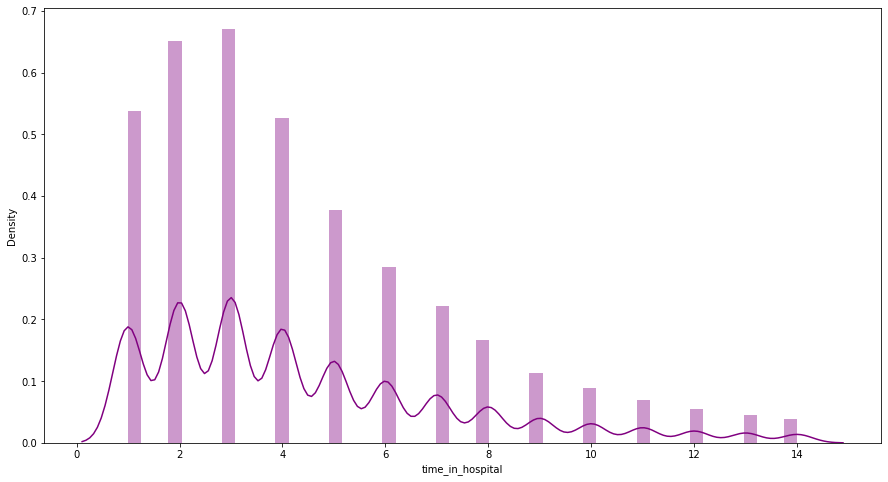

In [39]:
# Lets see the Distribution 
sns.distplot(data1_num.time_in_hospital,color = "purple")
plt.show()

In [40]:
data1_num.time_in_hospital.unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [41]:
data1_cat.head()

,race,gender,age,weight
0,Caucasian,Female,[0-10),?
1,Caucasian,Female,[10-20),?
2,AfricanAmerican,Female,[20-30),?
3,Caucasian,Male,[30-40),?
4,Caucasian,Male,[40-50),?


In [43]:
############race########################

# **categories** in race column
'Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'


In [44]:
data1_cat.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [45]:
## invalid assignment in race column
print(data1_cat.race[data1_cat.race == "?"].count()," is the count of invalid assign catagory")
print(round((data1_cat.race[data1_cat.race == "?"].count()/len(data1_cat.race))*100,2),\
      " percent datapoints are assigned wrongly in race column.")

2273  is the count of invalid assign catagory
2.23  percent datapoints are assigned wrongly in race column.


In [ ]:
# Lets check which catagory is more dence
sns.countplot(data1_cat.race)
plt.show()

# **Categories** in Gender Column
'Female', 'Male', 'Unknown/Invalid'

In [46]:
data1_cat.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


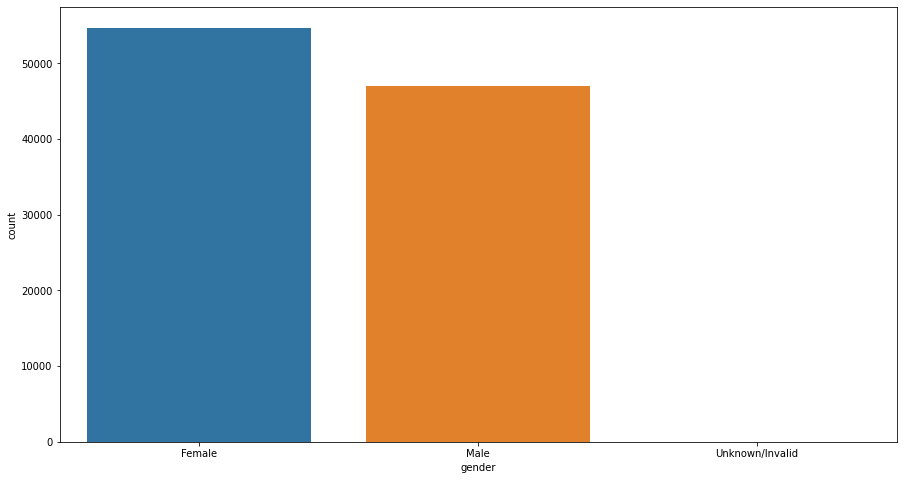

In [47]:
# Drow counplot to understand the density
sns.countplot(data1_cat.gender)
plt.show()

In [48]:
data1_cat.columns

Index(['race', 'gender', 'age', 'weight'], dtype='object')

# **Categories** in Age column
'[70-80)', '[60-70)', '[50-60)', '[80-90)', '[40-50)', '[30-40)',
       '[90-100)', '[20-30)', '[10-20)', '[0-10)'

In [49]:
data1_cat.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


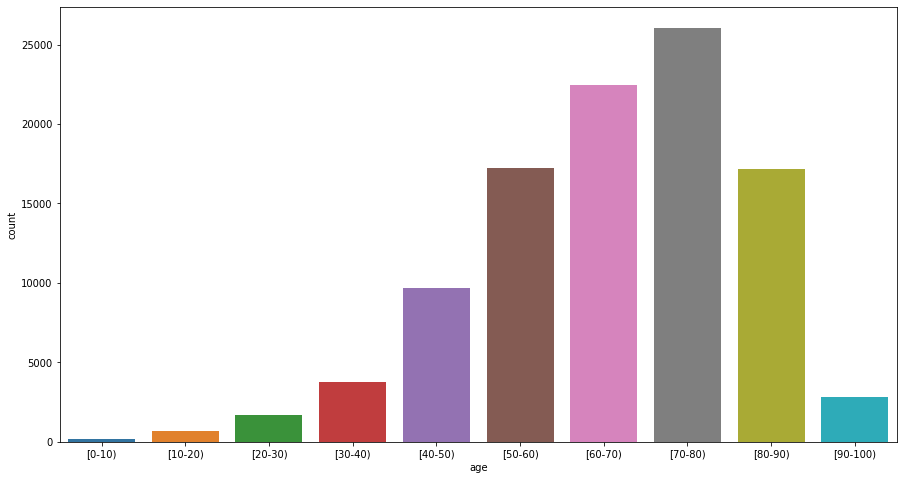

In [50]:
# Lets check the dencity of people who come in Hospiat in age of
sns.countplot(data1_cat.age)
plt.show()

In [51]:
#############################weight##################################
data1_cat.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


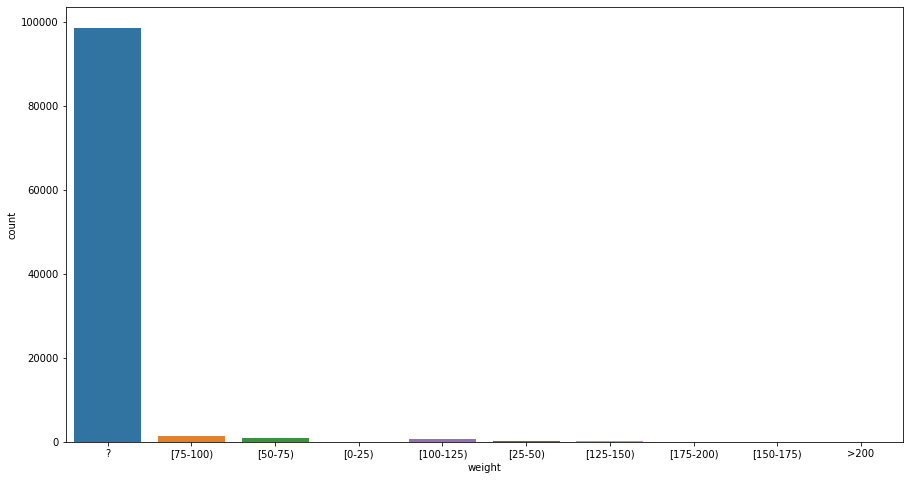

In [52]:
# plot the distribution
sns.countplot(data1_cat.weight)
plt.show()

In [54]:
## invalid assignment in weight column
print(data1_cat.weight[data1_cat.weight == "?"].count()," is the count of invalid assign catagory")
print(round((data1_cat.weight[data1_cat.weight == "?"].count()/len(data1_cat.weight))*100,2),\
      " percent datapoints are assigned wrongly in weight column.")

98569  is the count of invalid assign catagory
96.86  percent datapoints are assigned wrongly in weight column.


In [60]:
pd.crosstab(data1.patient_nbr,data1.readmitted)

readmitted,<30,>30,NO
patient_nbr,,,
135,1,1,0
378,0,0,1
729,0,0,1
774,0,0,1
927,0,0,1
...,...,...,...
189351095,0,0,1
189365864,0,0,1
189445127,0,0,1


# **Multivariate Analysis**



In [62]:
target = data.readmitted.copy()
Target = pd.DataFrame(data = target)
Target.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


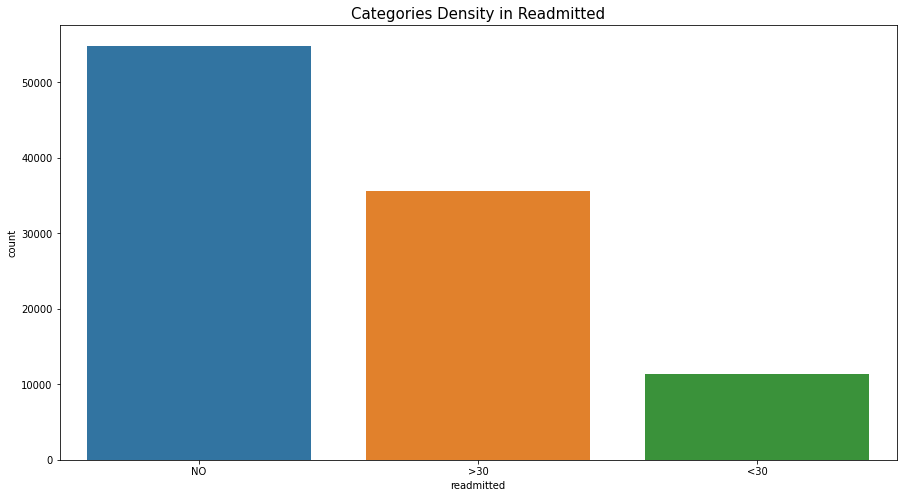

In [63]:
# First thing the encounter_id with target (readmited) not make any possible sense but let understand is there any inside
# Lets first handle target variable
sns.countplot(target)
plt.title("Categories Density in Readmitted",fontsize = 15)
plt.show()

In [65]:
### As we see here we have 3 catagories
## NO----> patient not admitted any more
## >30---> admitted but after 30 days
## <30---> admitted befor 30 days
# By using that we can say that our most prior targets are the paitent who admit before 30 days then next is after 30 days
# Lets check the percentage of those target patients

In [66]:
target.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [67]:
# Paitent admitted before 30 days (<30) <First Proirity in analysis>
print(target.value_counts()[2]," that much number of patients are admitted before 30 days.")
print(round((target.value_counts()[2]/len(target))*100,2)," that much percent patients are admitted before 30 days")

11357  that much number of patients are admitted before 30 days.
11.16  that much percent patients are admitted before 30 days


In [68]:
# patients are admitted but after 30 days (>30) <Second Priority in Analysis>
print(target.value_counts()[1]," that much number of patients are admitted but after 30 days.")
print(round((target.value_counts()[1]/len(target))*100,2)," that much percent patients are admitted after 30 days")

35545  that much number of patients are admitted but after 30 days.
34.93  that much percent patients are admitted after 30 days


In [69]:
# People Not readmitted
print(target.value_counts()[0]," that much people are not readdmitted, numbers.")
print(round((target.value_counts()[0]/len(target))*100,2)," That much percent people are not readdmitted.")

54864  that much people are not readdmitted, numbers.
53.91  That much percent people are not readdmitted.


In [ ]:
# Sorting the columns according to their Data Types
num = data1.select_dtypes(include=[np.number]) ## Numerical Columns
cat = data1.select_dtypes(include = [np.object]) ## Categorical Columns

In [70]:
## Patient Number
pd.crosstab(data1.patient_nbr,data1.readmitted)

readmitted,<30,>30,NO
patient_nbr,,,
135,1,1,0
378,0,0,1
729,0,0,1
774,0,0,1
927,0,0,1
...,...,...,...
189351095,0,0,1
189365864,0,0,1
189445127,0,0,1


In [71]:
## admission_source_id
pd.crosstab(data1.admission_source_id,data1.readmitted)

readmitted,<30,>30,NO
admission_source_id,,,
1,3130,9640,16795
2,111,310,683
3,29,58,100
4,309,672,2206
5,101,236,518
6,212,398,1654
7,6720,21667,29107
8,2,4,10
9,13,16,96


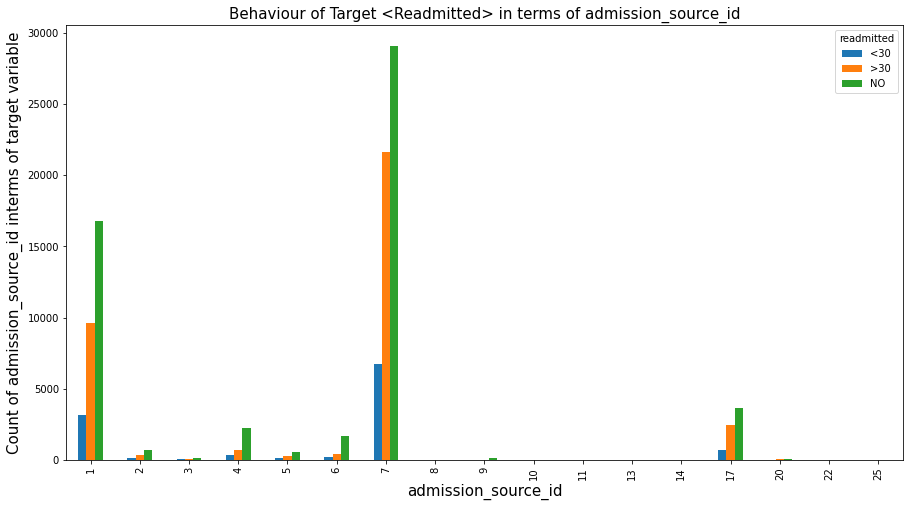

In [72]:
pd.crosstab(data1.admission_source_id,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of admission_source_id", fontsize = 15)
plt.ylabel("Count of admission_source_id interms of target variable", fontsize = 15)
plt.xlabel("admission_source_id",fontsize = 15)
plt.show()

In [73]:
# as wee see here most of the patients who admitted are by Physician Referral (1) or refer by Emergency Room
# 17 that have Null values.

In [74]:
##time_in_hospital
pd.crosstab(data1.time_in_hospital,data1.readmitted)

readmitted,<30,>30,NO
time_in_hospital,,,
1,1162,4471,8575
2,1712,5919,9593
3,1894,6085,9777
4,1644,5064,7216
5,1199,3586,5181
6,949,2755,3835
7,752,2123,2984
8,625,1589,2177
9,412,1099,1491


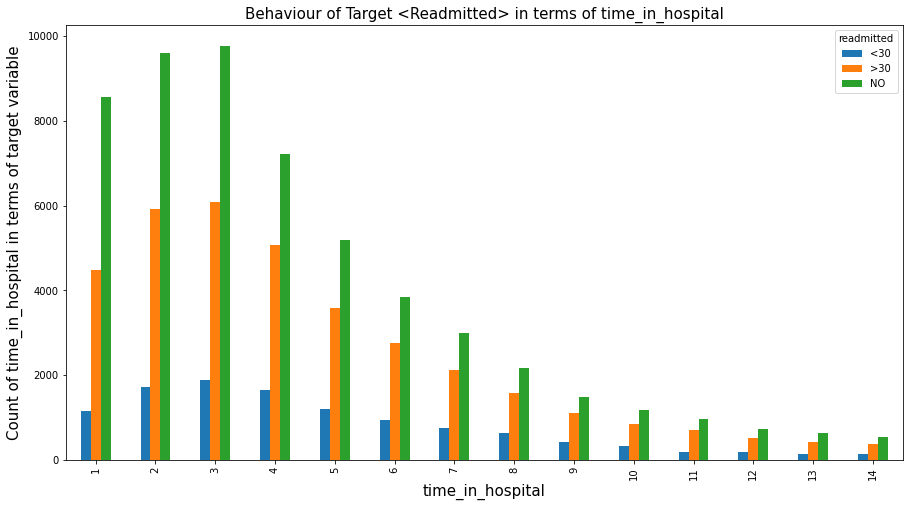

In [75]:
pd.crosstab(data1.time_in_hospital,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of time_in_hospital", fontsize = 15)
plt.ylabel("Count of time_in_hospital in terms of target variable", fontsize = 15)
plt.xlabel("time_in_hospital",fontsize = 15)
plt.show()

In [76]:
## race
pd.crosstab(data1.race,data1.readmitted)

readmitted,<30,>30,NO
race,,,
?,188,538,1547
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,145,446,915


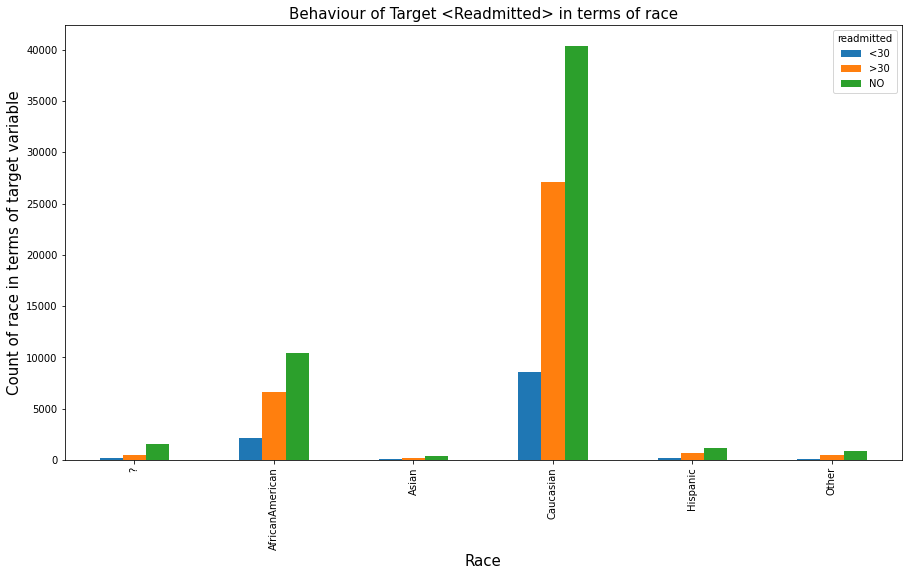

In [78]:
pd.crosstab(data1.race,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of race", fontsize = 15)
plt.ylabel("Count of race in terms of target variable", fontsize = 15)
plt.xlabel("Race",fontsize = 15)
plt.show()

In [79]:
## admission_type_id
pd.crosstab(data1.admission_type_id,data1.readmitted)

readmitted,<30,>30,NO
admission_type_id,,,
1,6221,19309,28460
2,2066,6452,9962
3,1961,5746,11162
4,1,2,7
5,495,1721,2569
6,586,2231,2474
7,0,0,21
8,27,84,209


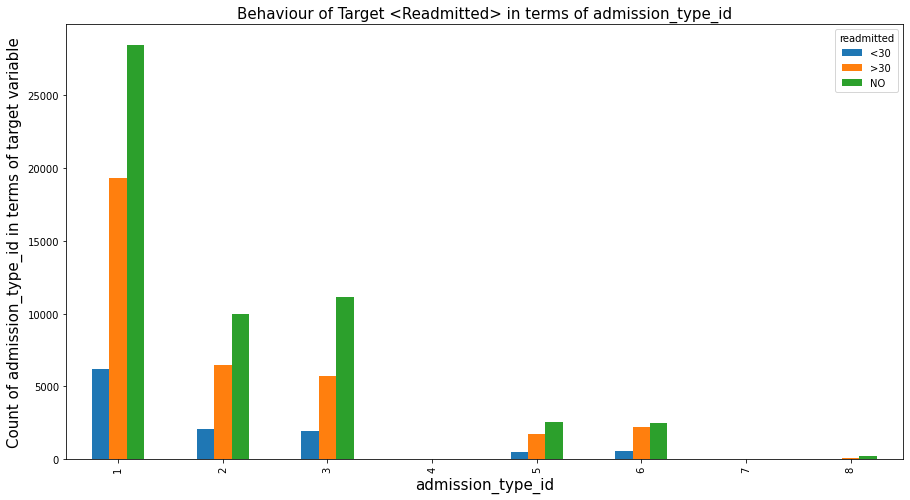

In [80]:
pd.crosstab(data1.admission_type_id,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of admission_type_id", fontsize = 15)
plt.ylabel("Count of admission_type_id in terms of target variable", fontsize = 15)
plt.xlabel("admission_type_id",fontsize = 15)
plt.show()

In [81]:
### discharge_disposition_id
pd.crosstab(data1.discharge_disposition_id,data1.readmitted)

readmitted,<30,>30,NO
discharge_disposition_id,,,
1,5602,21517,33115
2,342,668,1118
3,2046,4916,6992
4,104,278,433
5,247,350,587
6,1638,5362,5902
7,90,221,312
8,15,38,55
9,9,2,10


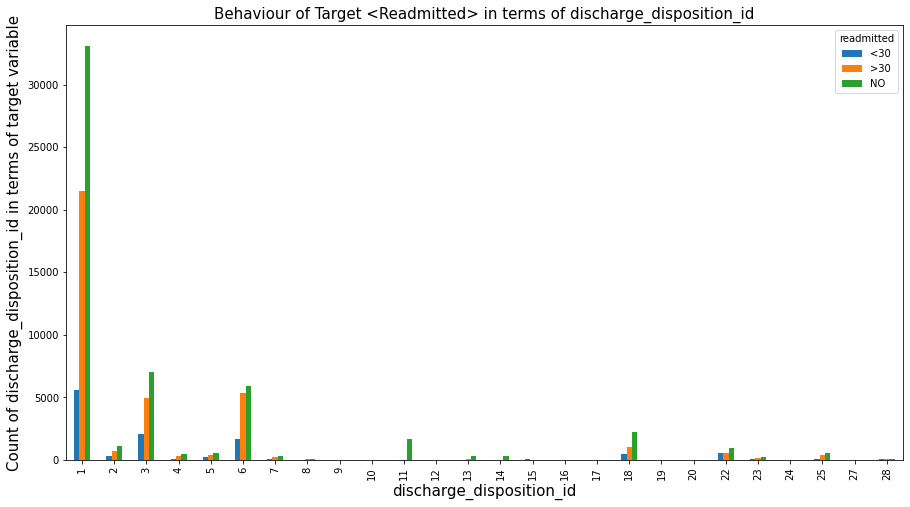

In [82]:
pd.crosstab(data1.discharge_disposition_id,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of discharge_disposition_id", fontsize = 15)
plt.ylabel("Count of discharge_disposition_id in terms of target variable", fontsize = 15)
plt.xlabel("discharge_disposition_id",fontsize = 15)
plt.show()

In [83]:
### age
pd.crosstab(data1.age,data1.readmitted)

readmitted,<30,>30,NO
age,,,
[0-10),3,26,132
[10-20),40,224,427
[20-30),236,510,911
[30-40),424,1187,2164
[40-50),1027,3278,5380
[50-60),1668,5917,9671
[60-70),2502,7897,12084
[70-80),3069,9475,13524
[80-90),2078,6223,8896


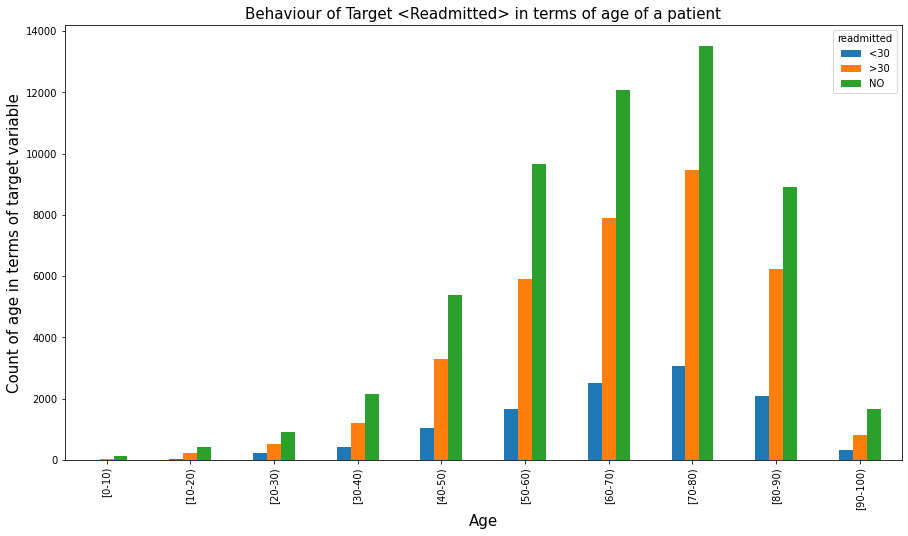

In [84]:
pd.crosstab(data1.age,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of age of a patient", fontsize = 15)
plt.ylabel("Count of age in terms of target variable", fontsize = 15)
plt.xlabel("Age",fontsize = 15)
plt.show()

In [85]:
## Weight
pd.crosstab(data1.weight,data1.readmitted)

readmitted,<30,>30,NO
weight,,,
>200,0,3,0
?,11000,34035,53534
[0-25),8,31,9
[100-125),67,292,266
[125-150),12,69,64
[150-175),3,16,16
[175-200),1,5,5
[25-50),8,42,47
[50-75),105,389,403


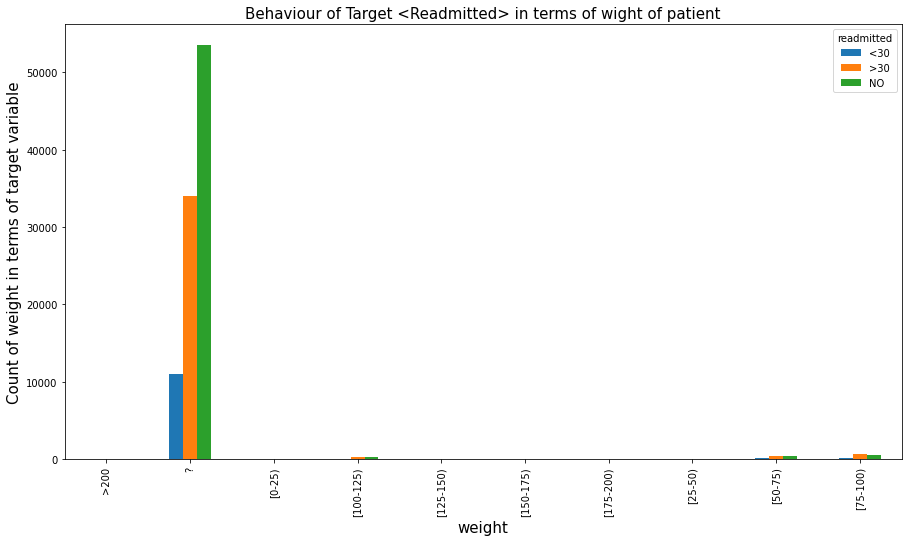

In [86]:
pd.crosstab(data1.weight,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of wight of patient", fontsize = 15)
plt.ylabel("Count of weight in terms of target variable", fontsize = 15)
plt.xlabel("weight",fontsize = 15)
plt.show()

In [87]:
## Gender VS target
pd.crosstab(data1.gender,data1.readmitted)

readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823
Unknown/Invalid,0,0,3


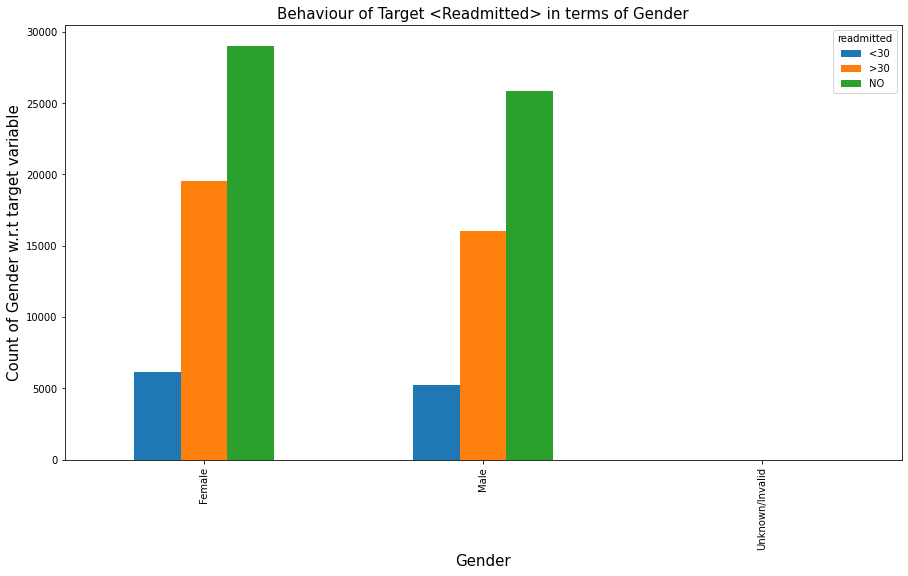

In [88]:
pd.crosstab(data1.gender,data1.readmitted).plot(kind = "bar")
plt.title("Behaviour of Target <Readmitted> in terms of Gender", fontsize = 15)
plt.ylabel("Count of Gender w.r.t target variable", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.show()

# **Coversion of "?" in NaN**

In [89]:
data1[data1 == "?"] = np.nan

In [90]:
data1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
readmitted                      0
dtype: int64

# **Unique Values Present:**

In [91]:
for i in data2.columns:
    print('{} :: {}\n'.format(i,data2[i].unique()))

readmitted :: ['NO' '>30' '<30']

payer_code :: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty :: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'Physi

# **Value Changes**

In [92]:
data2.payer_code.replace('?',np.nan,inplace=True)
data2.medical_specialty.replace('?',np.nan,inplace=True)
data2.diag_2.replace('?',np.nan,inplace=True)
data2.diag_3.replace('?',np.nan,inplace=True)

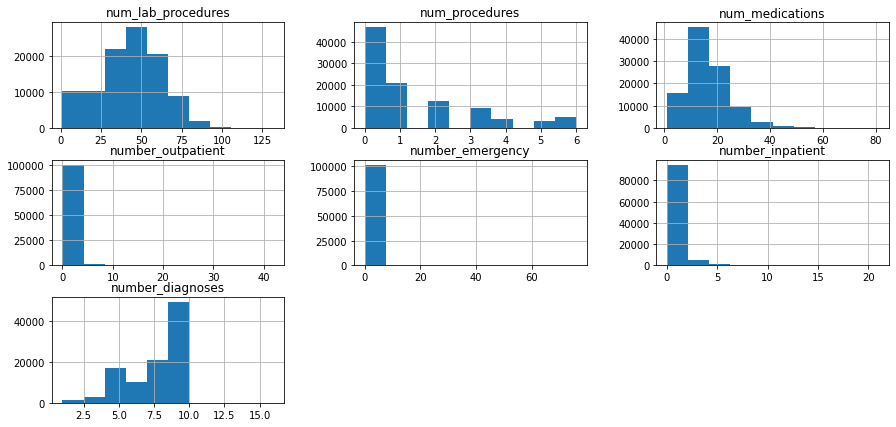

In [93]:
data2.hist(figsize=(15,7))
plt.show()

In [94]:
cat_cols = data2.select_dtypes('object').columns
num_cols = data2.select_dtypes(np.number).columns

# **Univariate Analysis**

Numerical Columns Distribution Check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


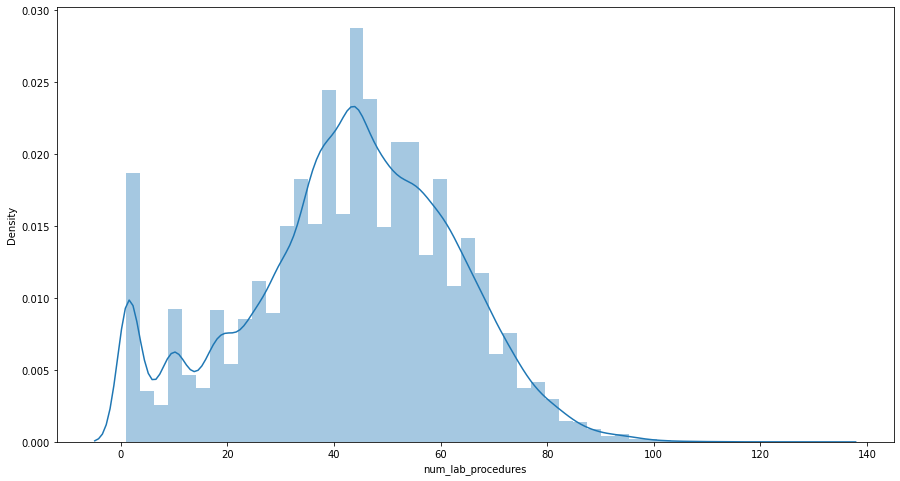

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


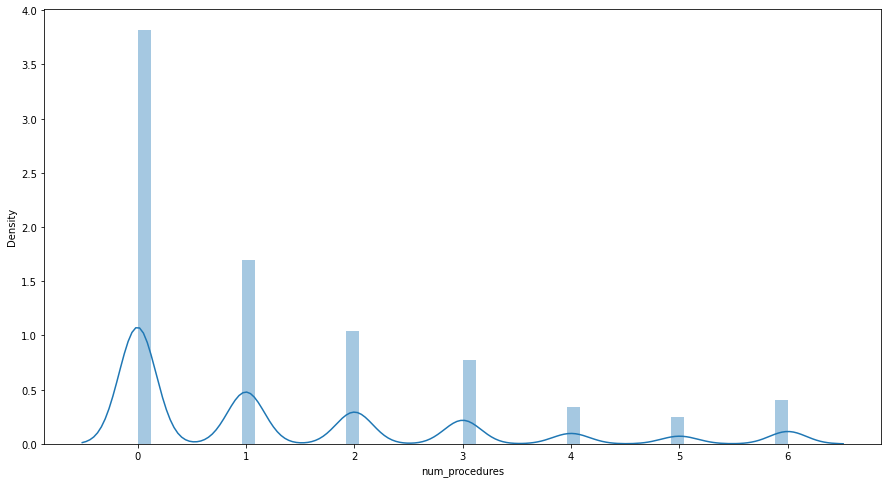

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


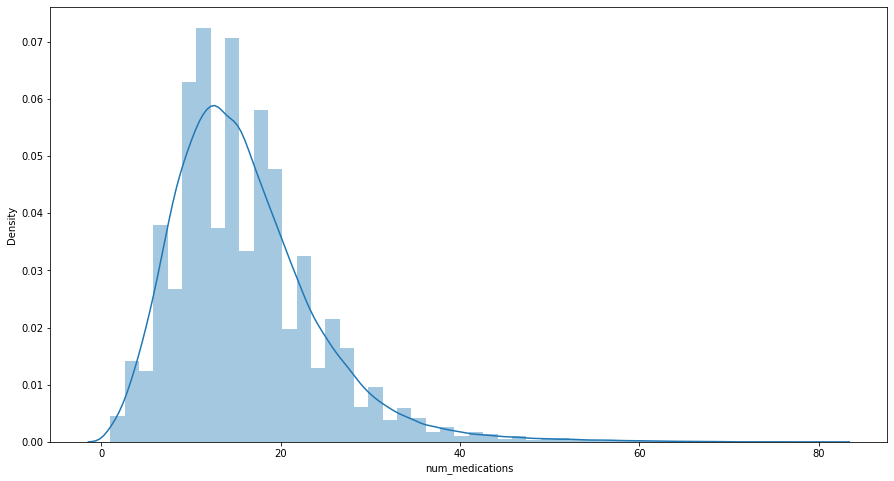

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


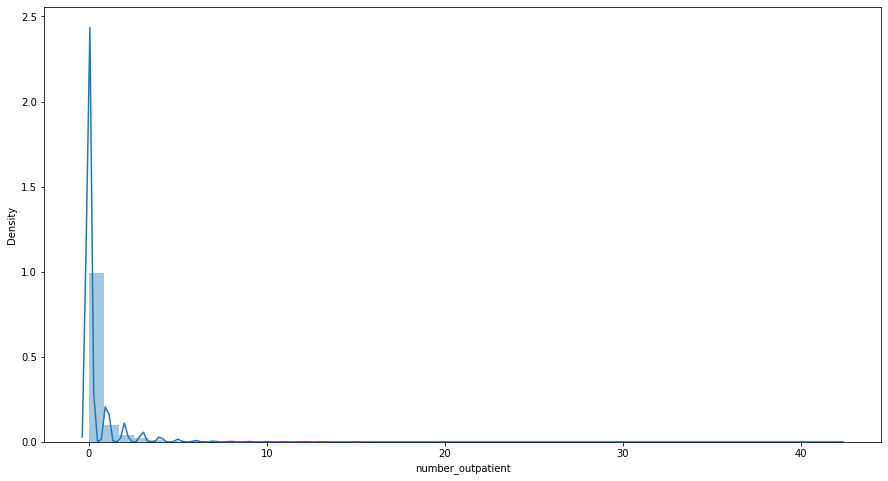

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


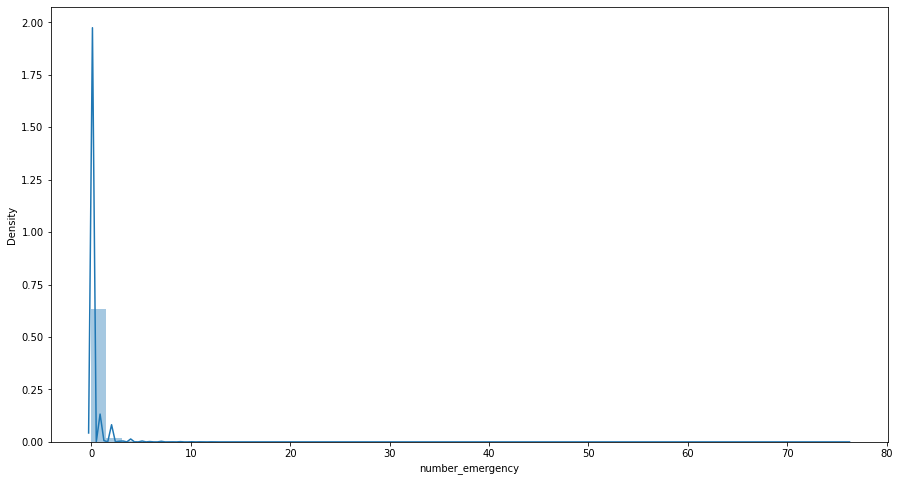

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


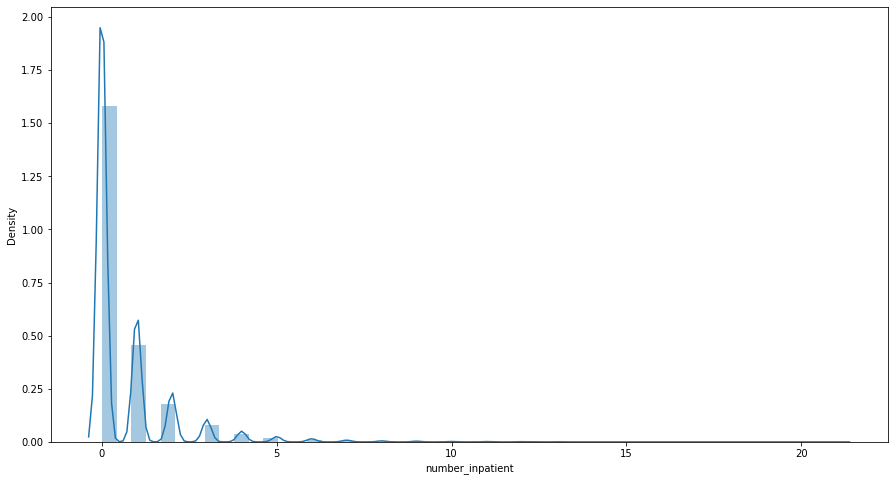

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


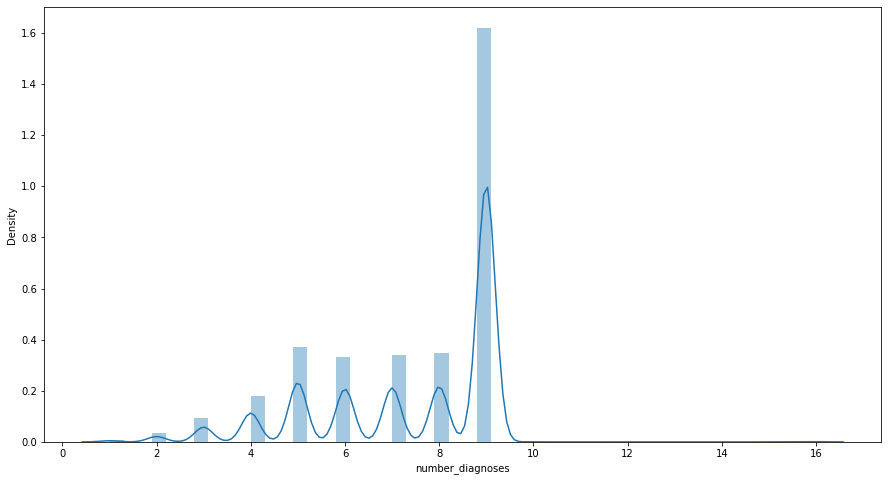

In [95]:
for i in num_cols:
    sns.distplot(data2[i])
    plt.show()

#**We can see that there are Lot of Outliers here:**
    * num_lab_procedures
    * num_medications
    * number_outpatient
    * number_emergency
    * number_inpatient
    * number_diagnoses

# **Categorical Columns Distribution Check**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


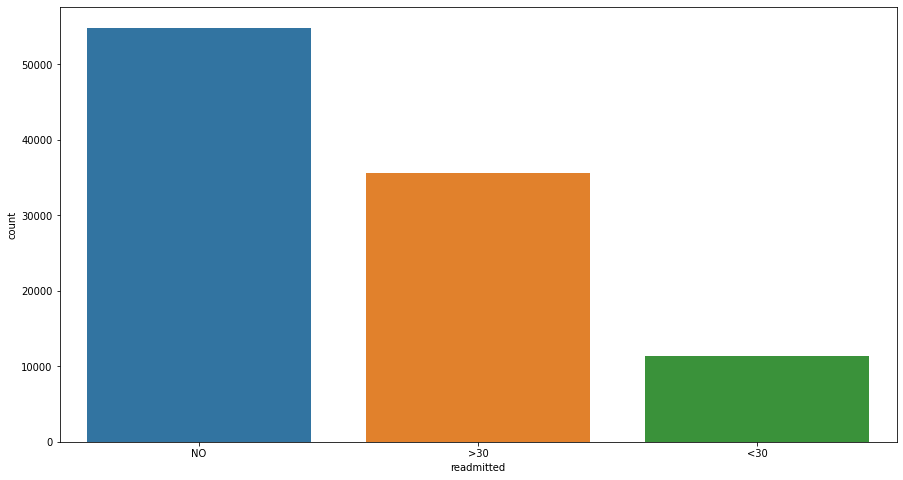

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


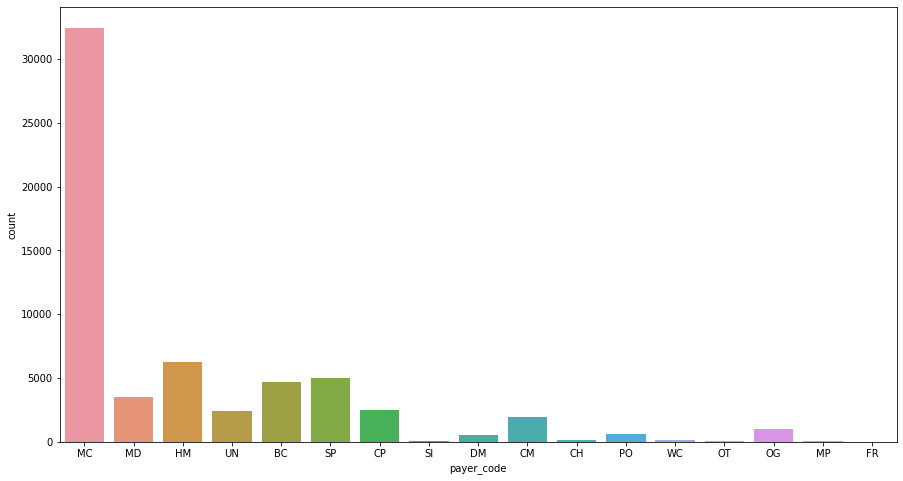

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


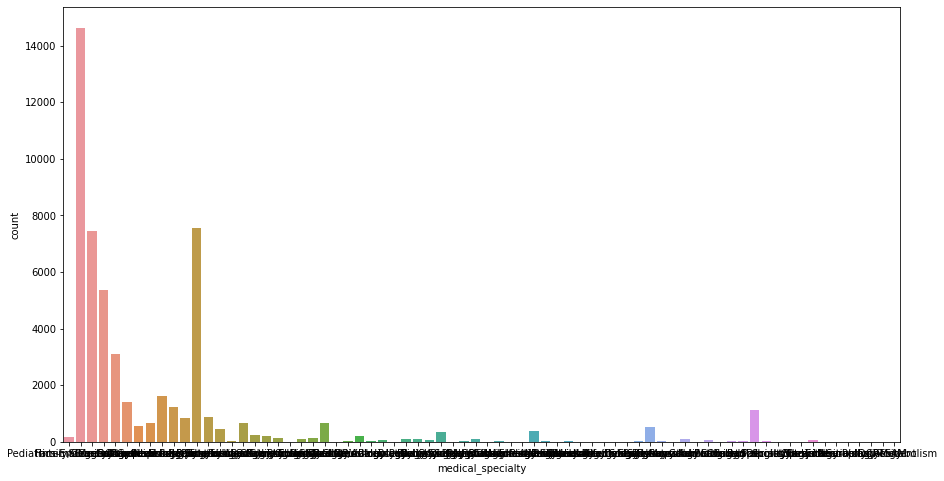

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


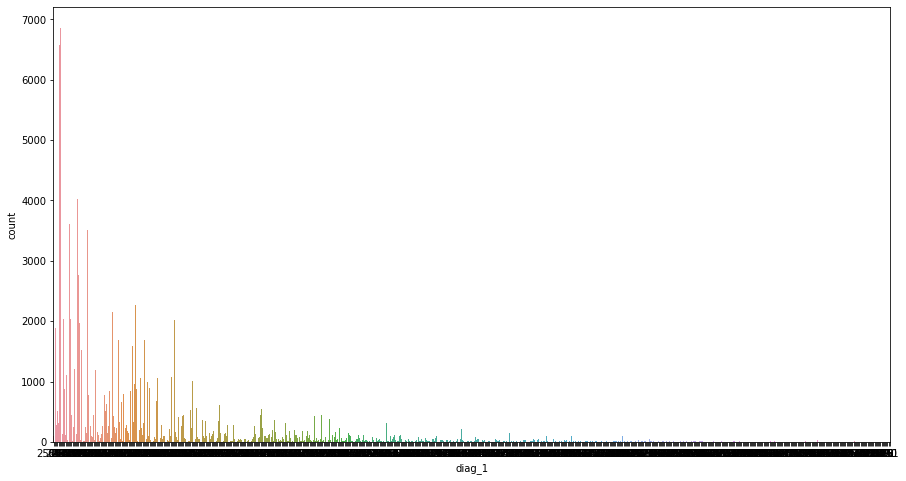

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


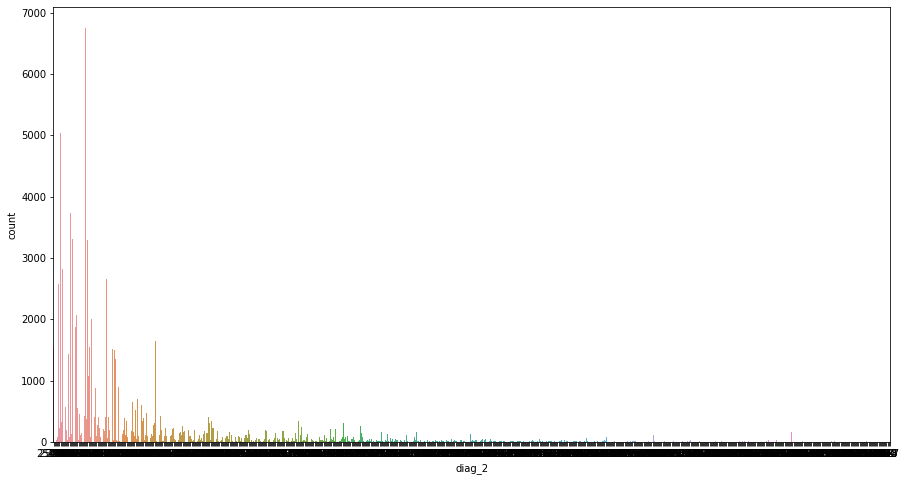

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


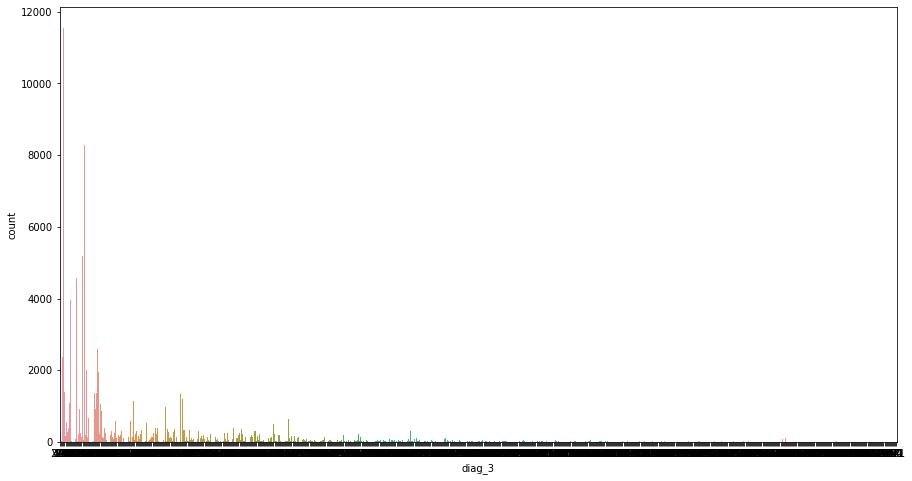

In [96]:
for i in cat_cols:
    sns.countplot(data2[i])
    plt.show()
    
# cat_cols

* We can see that there are Extremely Large Number of Categories in diag1,diag2,diag3 approx(700 in each that too Nominal Categories)

# **BiVariate Analysis**

Numerical Columns v/s Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


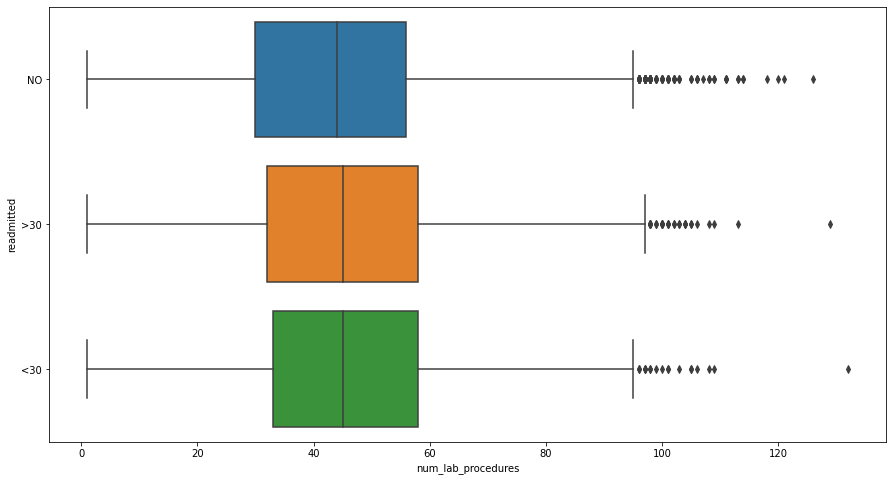

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


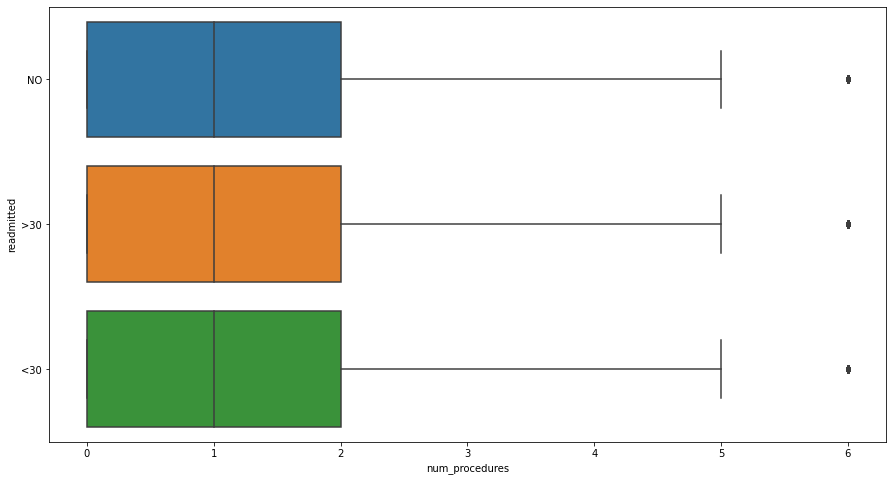

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


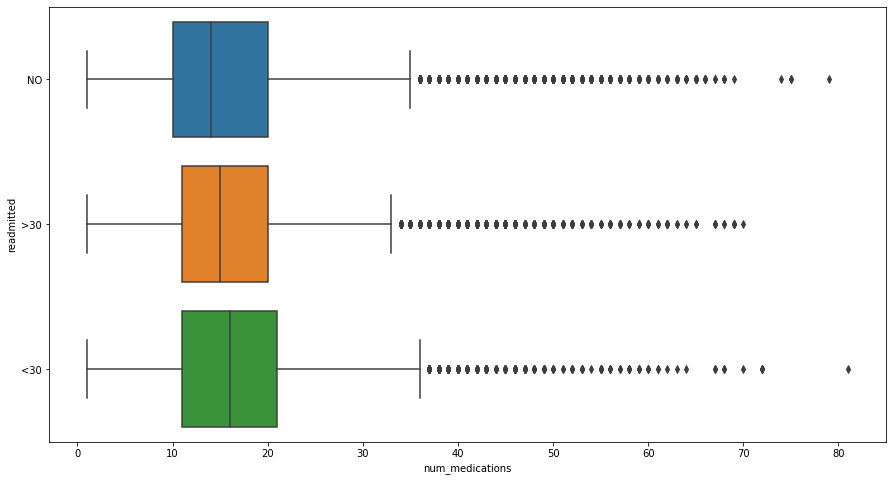

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


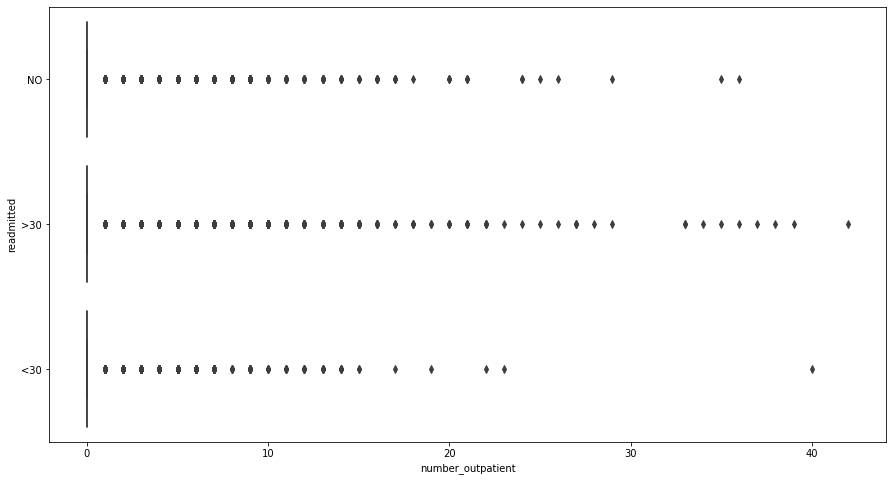

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


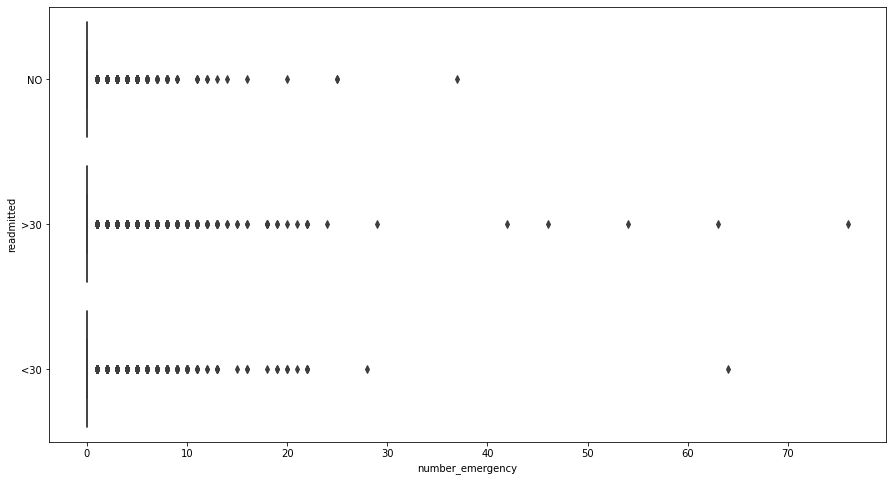

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


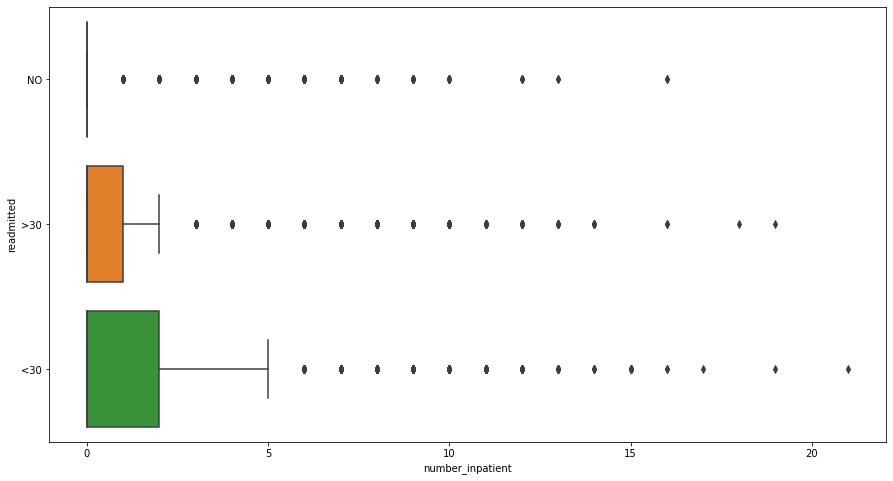

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


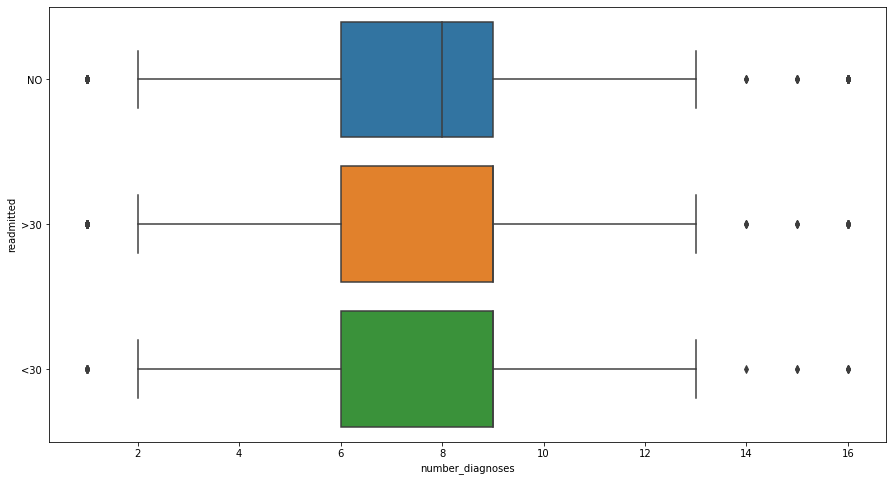

In [97]:
for i in num_cols:
    sns.boxplot(data2[i],data2.readmitted)
    plt.show()

* Those patients who have undergone higher Lab_Procedures have lesser chance of re-admission

# **Categorical Columns v/s Target**

readmitted   <30    >30     NO
payer_code                    
BC           426   1301   2928
CH            13     33    100
CM           198    661   1078
CP           214    781   1538
DM            64    220    265
FR             0      0      1
HM           644   2320   3310
MC          3810  11982  16647
MD           416   1259   1857
MP             9     39     31
OG           136    333    564
OT             7     38     50
PO            44    144    404
SI             7     17     31
SP           510   1869   2628
UN           227    696   1525
WC             5     24    106 




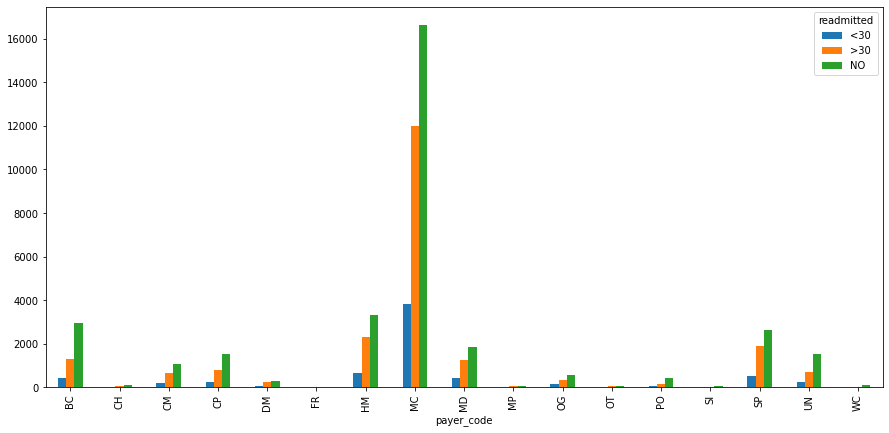

readmitted                        <30   >30    NO
medical_specialty                                
AllergyandImmunology                3     3     1
Anesthesiology                      1     3     8
Anesthesiology-Pediatric            1     5    13
Cardiology                        425  1853  3074
Cardiology-Pediatric                1     4     2
...                               ...   ...   ...
Surgery-PlasticwithinHeadandNeck    0     1     0
Surgery-Thoracic                   11    30    68
Surgery-Vascular                   74   200   259
SurgicalSpecialty                   2     9    22
Urology                            68   185   432

[72 rows x 3 columns] 




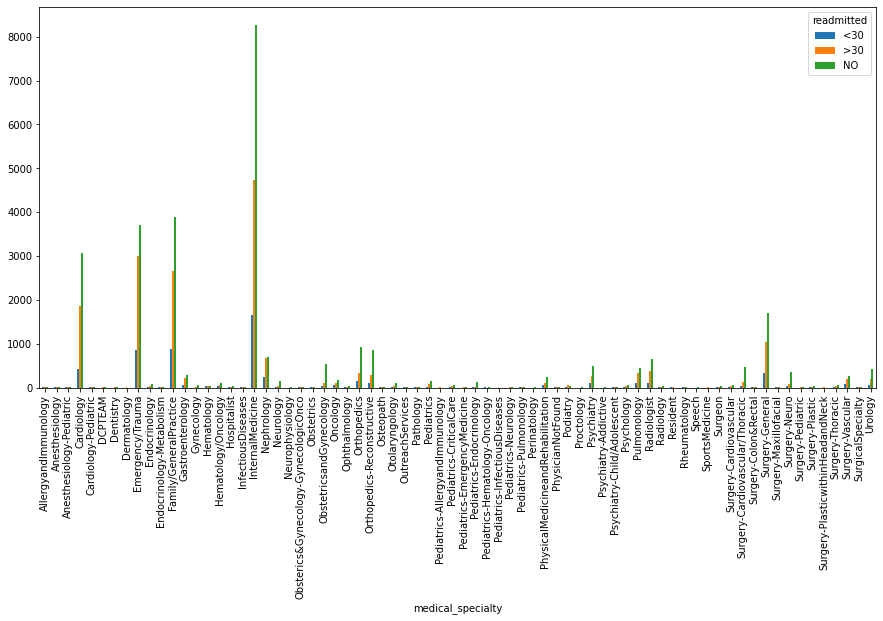

readmitted  <30  >30  NO
diag_1                  
10            0    0   1
11            0    3   7
110           0    1   1
112          14   26  33
114           0    1   0
...         ...  ...  ..
V63           1    1   6
V66           0    0   2
V67           0    1   0
V70           0    0   1
V71           0    2   7

[717 rows x 3 columns] 




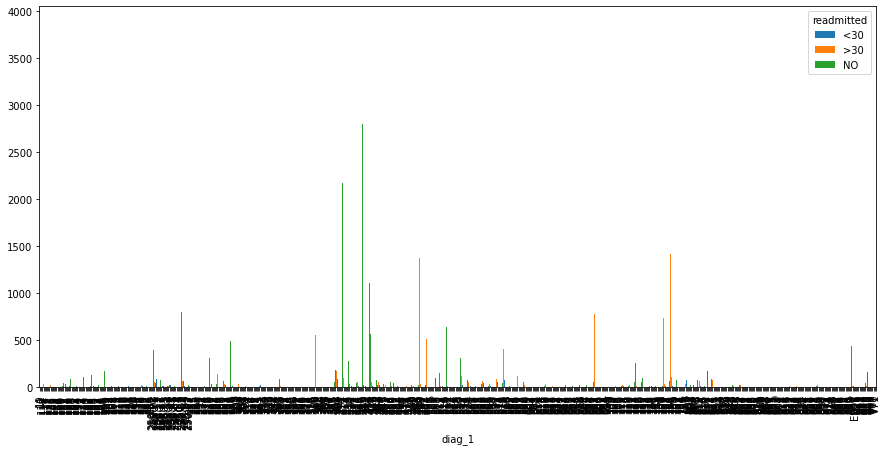

readmitted  <30  >30   NO
diag_2                   
11            1    1    1
110           2    3    3
111           0    0    1
112          28   75   98
114           1    0    0
...         ...  ...  ...
V69           0    0    1
V70           0    3    4
V72           0    1   12
V85          22   36  111
V86           0    1    1

[748 rows x 3 columns] 




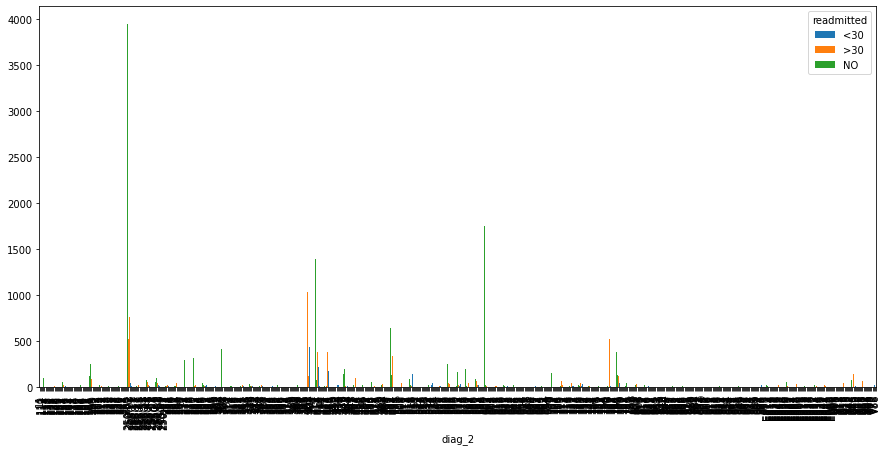

readmitted  <30  >30   NO
diag_3                   
11            1    0    1
110           2    6   12
111           1    0    0
112          22   73  111
115           0    0    1
...         ...  ...  ...
V66           1    3   14
V70           0    0    2
V72           1    1    6
V85           9   22   65
V86           0    1    2

[789 rows x 3 columns] 




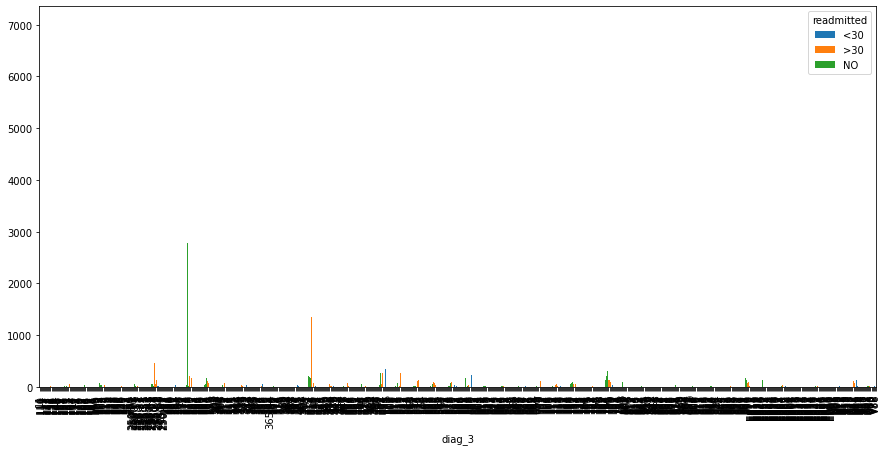

In [98]:
for i in cat_cols[1:]:
    print(pd.crosstab(data2[i],data2.readmitted),'\n\n')
    pd.crosstab(data2[i],data2.readmitted).plot(kind='bar',figsize=(15,7))
    plt.show()

* Can't conclude to any inference for the diag1,diag2 and diag3 columns
* MC payer_code has higher occurences out of all others

# **Null Values Check**

In [99]:
(data2.isnull().sum()/data2.shape[0]*100).sort_values(ascending=False)

medical_specialty     49.082208
payer_code            39.557416
diag_3                 1.398306
diag_2                 0.351787
number_diagnoses       0.000000
diag_1                 0.000000
number_inpatient       0.000000
number_emergency       0.000000
number_outpatient      0.000000
num_medications        0.000000
num_procedures         0.000000
num_lab_procedures     0.000000
readmitted             0.000000
dtype: float64

In [100]:
data2.medical_specialty.value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
Pediatrics-InfectiousDiseases           1
SportsMedicine                          1
Dermatology                             1
Name: medical_specialty, Length: 72, dtype: int64

In [101]:
data2.payer_code.value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

### Medical_Speciality and Payer Code have higher Missing Values
    --Lets see how we can handle them!!

In [102]:
data2.medical_specialty.value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
Pediatrics-InfectiousDiseases           1
SportsMedicine                          1
Dermatology                             1
Name: medical_specialty, Length: 72, dtype: int64

In [103]:
data2[data2.medical_specialty.isnull()]

,readmitted,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,>30,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9
2,NO,NaN,NaN,11,5,13,2,0,1,648,250,V27,6
3,NO,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7
4,NO,NaN,NaN,51,0,8,0,0,0,197,157,250,5
5,>30,NaN,NaN,31,6,16,0,0,0,414,411,250,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,>30,DM,NaN,45,1,25,3,1,2,345,438,412,9
101761,>30,MC,NaN,51,0,16,0,0,0,250.13,291,458,9
101762,NO,MC,NaN,33,3,18,0,0,1,560,276,787,9
101763,NO,MC,NaN,53,0,9,1,0,0,38,590,296,13


In [104]:
data2.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

# **Diagnosis Codes**

```
Group name      icd9 codes

Circulatory     390–459, 785
Respiratory     460–519, 786
Digestive       520–579, 787
Diabetes        250.xx
Injury          800–999
Musculoskeletal 710–739
Genitourinary   580–629
Neoplasms       140–239,780, 781, 784, 790–799
                240–279, without 250
                680–709, 782
                001–139
                290–319
Other:          E–V
                280–289
                320–359
                630–679
                360–389
                740–759
```



* if icd_codes are missing, then filling with 'Others' in the Diagnoses kind.
* might delete icd9 codes later as the information is retained

Circulatory        30437
Respiratory        14423
Neoplasm           13887
Digestive           9475
Diabetic            8757
Others              7778
Injury              6974
Genitourinary       5078
Musculoskeletal     4957
Name: diag1_kind, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


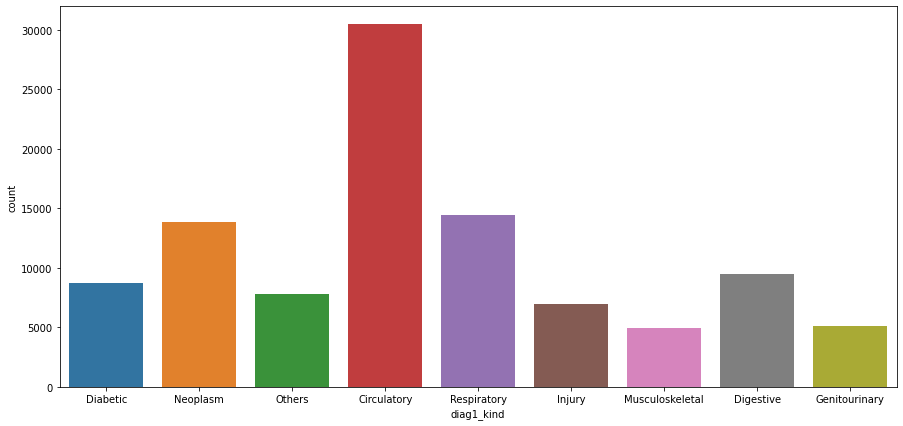

In [105]:
icd_circulatory = list(range(390,460))
icd_circulatory.append(785)
icd_circulatory = list(map(str,icd_circulatory))

icd_respiratory = list(range(460,520))
icd_respiratory.append(786)
icd_respiratory = list(map(str,icd_respiratory))

icd_digestive = list(range(520,580))
icd_digestive.append(787)
icd_digestive = list(map(str,icd_digestive))

icd_injury = list(range(800,1000))
icd_injury = list(map(str,icd_injury))

icd_musculoskeletal = list(range(710,740))
icd_musculoskeletal = list(map(str,icd_musculoskeletal))

icd_genitourinary = list(range(580,630))
icd_genitourinary = list(map(str,icd_genitourinary))

icd_neoplasms = list(range(1,280))
icd_neoplasms.extend(range(680,710))
icd_neoplasms.extend(range(290,320))
icd_neoplasms.extend(range(790,799))
icd_neoplasms.append(range(780,785))
icd_neoplasms.remove(250)
icd_neoplasms = list(map(str,icd_neoplasms))
# icd_neoplasms.remove(783)

def diabetic_check(x):
    if str(x) == np.nan:
        return np.nan
    elif str(x)[:3] == '250':
        return 'Diabetic'
    elif x in icd_circulatory:
        return 'Circulatory'
    elif x in icd_respiratory:
        return 'Respiratory'
    elif x in icd_digestive:
        return 'Digestive'
    elif x in icd_injury:
        return 'Injury'
    elif x in icd_musculoskeletal:
        return 'Musculoskeletal'
    elif x in icd_genitourinary:
        return 'Genitourinary'
    elif x in icd_neoplasms:
        return 'Neoplasm'
    else:
        return 'Others'

data2['diag1_kind'] = data2.diag_1.apply(diabetic_check)
print(data2['diag1_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag1_kind)
plt.show()

Circulatory        31881
Neoplasm           19274
Diabetic           12794
Respiratory        10895
Others             10573
Genitourinary       7987
Digestive           4170
Injury              2428
Musculoskeletal     1764
Name: diag2_kind, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


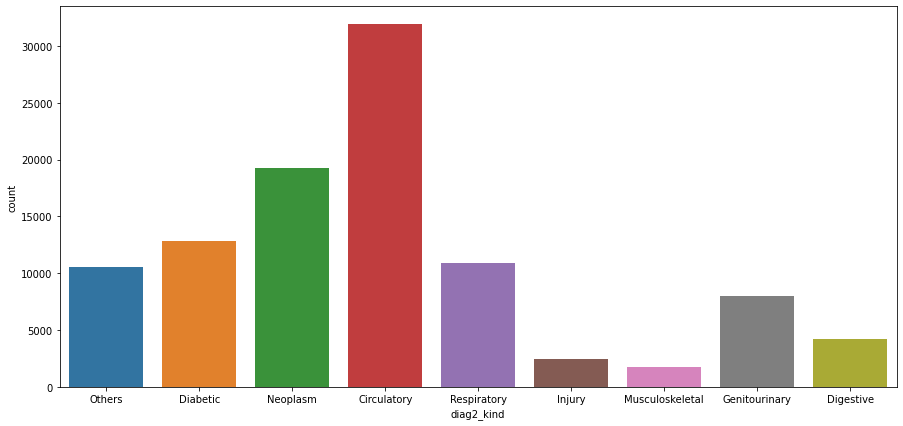

In [106]:
data2['diag2_kind'] = data2.diag_2.apply(diabetic_check)
print(data2['diag2_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag2_kind)
plt.show()

Circulatory        30306
Neoplasm           18851
Diabetic           17157
Others             13976
Respiratory         7358
Genitourinary       6327
Digestive           3930
Injury              1946
Musculoskeletal     1915
Name: diag3_kind, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


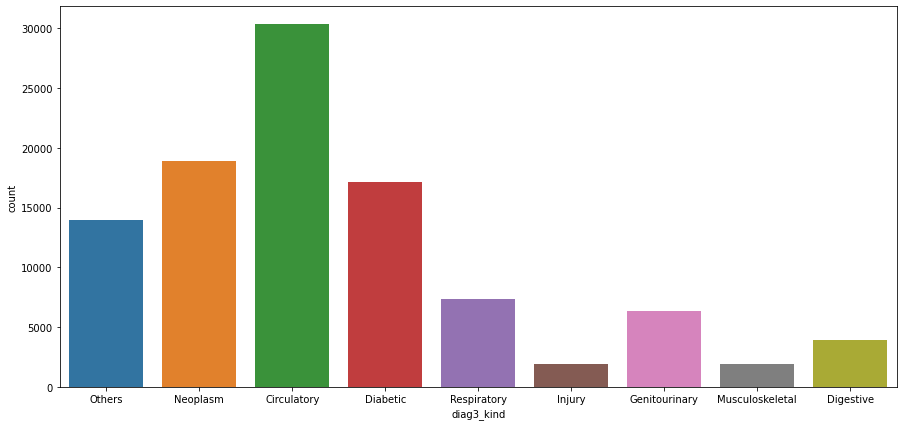

In [107]:
data2['diag3_kind'] = data2.diag_3.apply(diabetic_check)
print(data2['diag3_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag3_kind)
plt.show()

In [108]:
data2.isnull().sum()
# will drop payer_code

readmitted                0
payer_code            40256
medical_specialty     49949
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                  358
diag_3                 1423
number_diagnoses          0
diag1_kind                0
diag2_kind                0
diag3_kind                0
dtype: int64

In [109]:
data2.drop('payer_code',axis=1,inplace=True)
# No directrelation with the re-admission
# Heavy number of missing values 
# Heavy division of internal Categories as well

In [110]:
data2[data2.diag_2.isnull()]

,readmitted,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,diag1_kind,diag2_kind,diag3_kind
0,NO,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,Diabetic,Others,Others
66,NO,NaN,51,0,4,0,0,0,250.11,NaN,NaN,1,Diabetic,Others,Others
216,NO,Pediatrics-Endocrinology,34,0,4,0,0,0,250.03,NaN,NaN,1,Diabetic,Others,Others
263,NO,InternalMedicine,36,0,2,0,0,0,250.8,NaN,NaN,1,Diabetic,Others,Others
431,>30,InternalMedicine,63,0,5,0,0,0,250.13,NaN,NaN,1,Diabetic,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99621,>30,NaN,1,0,11,1,0,2,428,NaN,428,8,Circulatory,Others,Circulatory
100559,<30,InternalMedicine,63,0,16,0,1,0,599,NaN,41,8,Genitourinary,Others,Neoplasm
100787,NO,NaN,2,0,2,0,0,0,250.01,NaN,NaN,1,Diabetic,Others,Others
101192,>30,NaN,40,0,6,0,0,0,781,NaN,250.02,5,Others,Others,Diabetic


In [111]:
data2.medical_specialty.isnull().sum()/data2.shape[0]

0.49082208203132677

In [112]:
# Work in Progress
# Multidivision for Complications based on diagnoses

Types of Complications in Diabetes 

Diabetes mellitus without mention of complications	250.0x
Diabetes with ketoacidosis	                        250.1x
Diabetes with hyperosmolarity	                    250.2x
Diabetes with other coma	                        250.3x
Diabetes with renal manifestations	                250.4x
Diabetes with ophthalmic manifestations	            250.5x
Diabetes with neurological manifestation	        250.6x
Diabetes with peripheral circulatory disorders	    250.7x
Diabetes with other specified manifestations	    250.8x
Diabetes with unspecified complications	            250.9x

In [113]:
# filling null value complicatinos with other complications
def diabetes_complications(x):
    if pd.isnull(x):
        return 'other complications'
    elif x[:3]=='250':
        temp = x[4:5]
        if x=='250':
            return 'no complications'
        if temp == '0':
            return 'no complications'
        elif temp == '1':
            return 'ketoacidosis'
        elif temp == '2':
            return 'hypersmolarity'
        elif temp == '3':
            return 'other coma'
        elif temp == '4':
            return 'renal manifestation'
        elif temp == '5':
            return 'opthalmic manifestation'
        elif temp == '6':
            return 'neurological manifestation'
        elif temp == '7':
            return 'peripheral circulatory disorders'
        elif temp == '8':
            return 'specified complications'
        elif temp == '9':
            return 'unspecified complications'
        else:
            return 'no complications'
    else:
        return 'other complications'
    
data2['diag1_complications'] = data2['diag_1'].apply(diabetes_complications)
data2['diag2_complications'] = data2['diag_2'].apply(diabetes_complications)
data2['diag3_complications'] = data2['diag_3'].apply(diabetes_complications)

In [114]:
data2.isnull().sum()

readmitted                 0
medical_specialty      49949
num_lab_procedures         0
num_procedures             0
num_medications            0
number_outpatient          0
number_emergency           0
number_inpatient           0
diag_1                     0
diag_2                   358
diag_3                  1423
number_diagnoses           0
diag1_kind                 0
diag2_kind                 0
diag3_kind                 0
diag1_complications        0
diag2_complications        0
diag3_complications        0
dtype: int64

# Checking the Diagnosis Kind v/s Re-admission

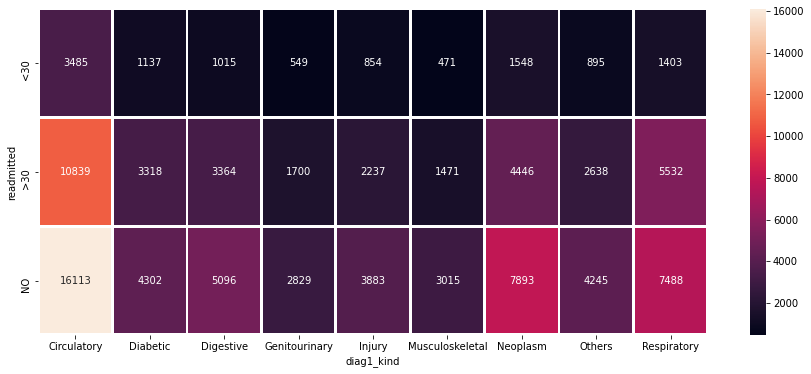

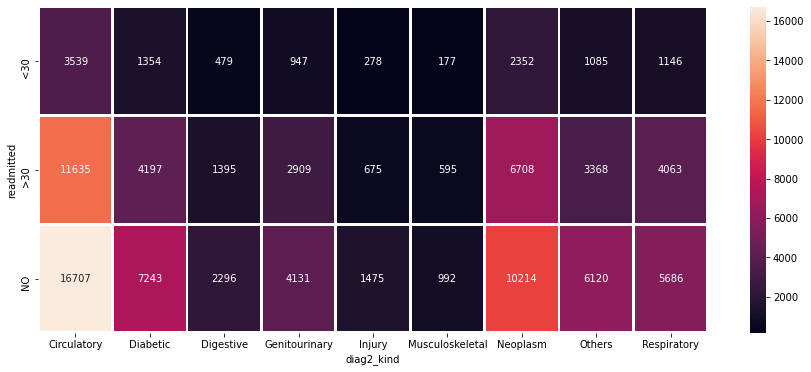

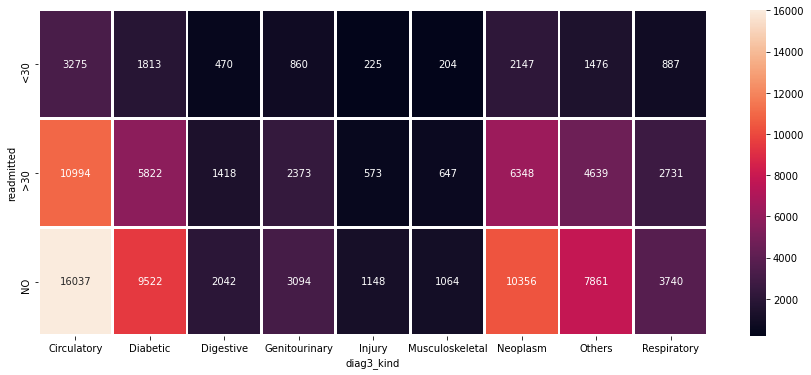

In [115]:
for i in (['diag1_kind','diag2_kind','diag3_kind']):
    ct = pd.crosstab(data2.readmitted,data2[i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

# Checking the Diagnosis Complications v/s Re-admission


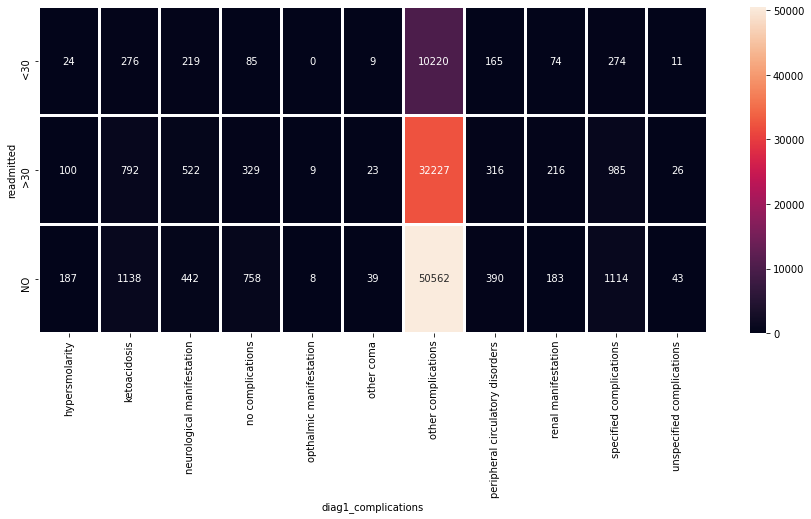

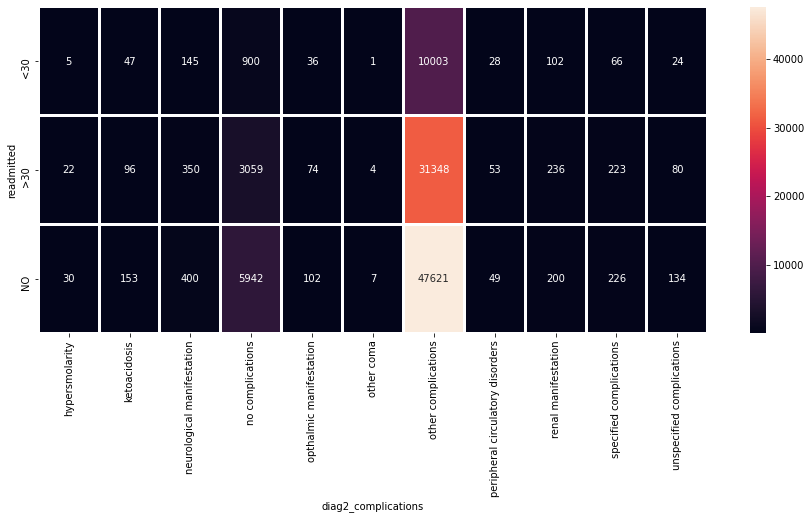

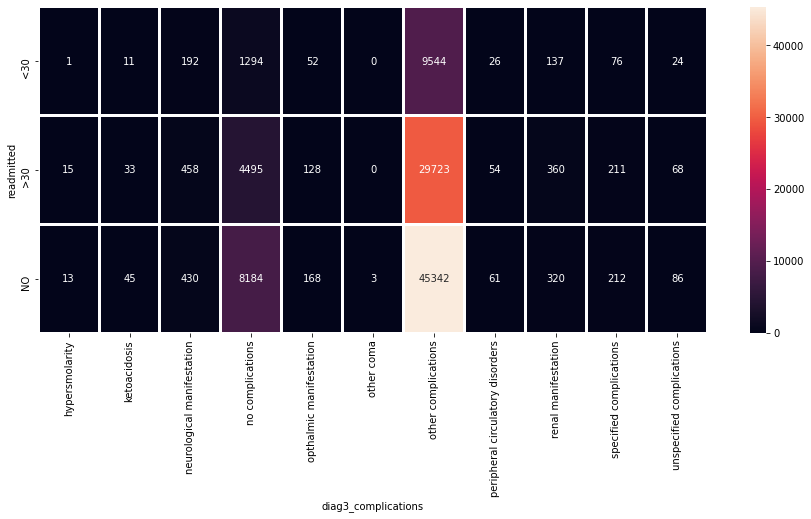

In [116]:
for i in (['diag1_complications','diag2_complications','diag3_complications']):
    ct = pd.crosstab(data2.readmitted,data2[i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

# Excluding Other Complications, lets look into complications v/s readmitted

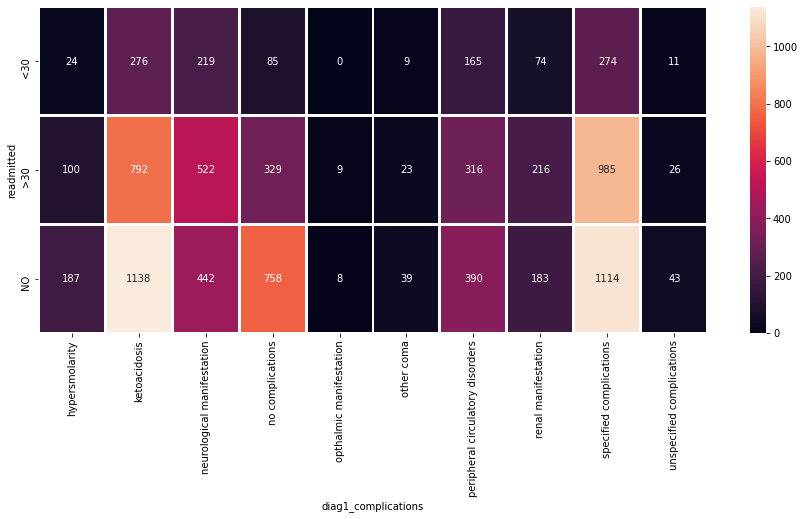

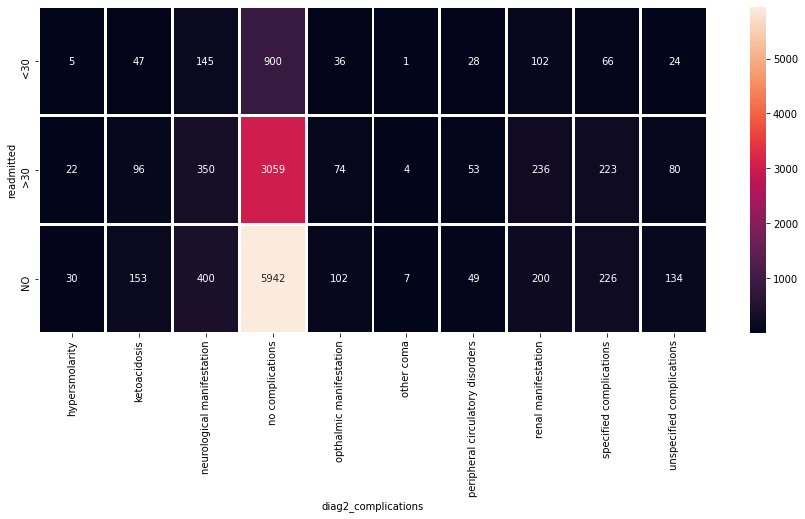

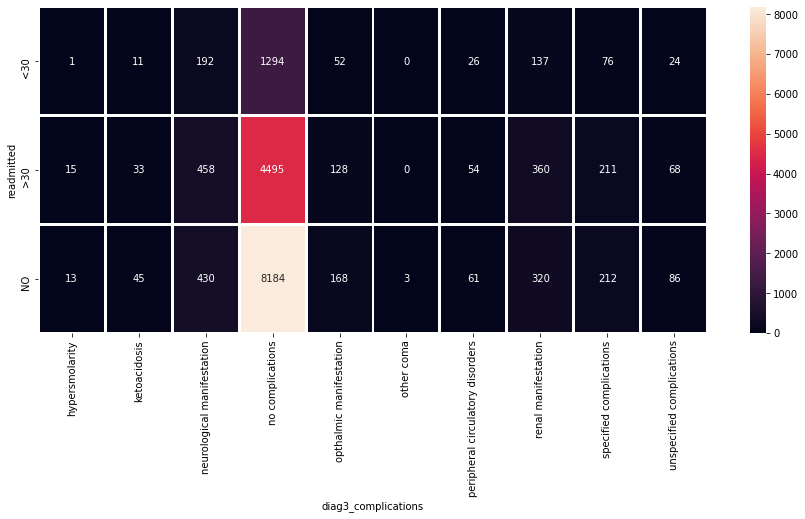

In [117]:
for i in (['diag1_complications','diag2_complications','diag3_complications']):
    ct = pd.crosstab(data2[data2[i]!='other complications']['readmitted'],data2[data2[i]!='other complications'][i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

In [118]:
# These kinds seem to be type 2 diabetic patients
data2[data2.diag_1=='250']

,readmitted,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications
882,NO,InternalMedicine,62,0,6,0,0,0,250,401,278,4,Diabetic,Circulatory,Neoplasm,no complications,other complications,other complications
3870,<30,Surgery-General,38,1,13,0,0,2,250,401,414,5,Diabetic,Circulatory,Circulatory,no complications,other complications,other complications
3899,NO,Pulmonology,57,0,7,0,0,0,250,493,401,4,Diabetic,Respiratory,Circulatory,no complications,other complications,other complications
4047,NO,InternalMedicine,51,0,12,0,0,0,250,272,305,4,Diabetic,Neoplasm,Neoplasm,no complications,other complications,other complications
5756,NO,NaN,18,0,15,0,0,0,250,486,276,8,Diabetic,Respiratory,Neoplasm,no complications,other complications,other complications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96897,NO,NaN,50,0,8,0,0,0,250,276,571,4,Diabetic,Neoplasm,Digestive,no complications,other complications,other complications
99488,>30,InternalMedicine,64,0,15,0,0,0,250,585,V42,9,Diabetic,Genitourinary,Others,no complications,other complications,other complications
100716,NO,Emergency/Trauma,34,0,5,0,0,0,250,276,789,5,Diabetic,Neoplasm,Others,no complications,other complications,other complications
100994,>30,Emergency/Trauma,2,0,13,0,1,0,250,599,276,5,Diabetic,Genitourinary,Neoplasm,no complications,other complications,other complications


# Univariate Analysis

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


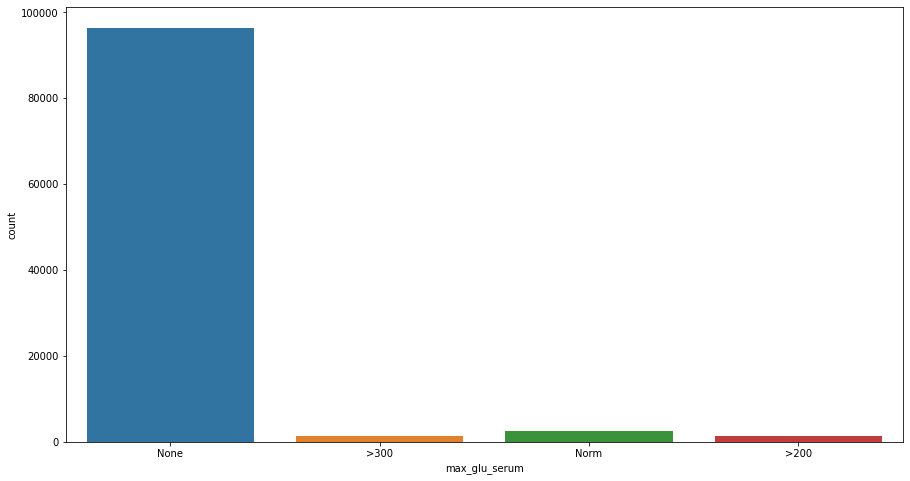

In [119]:
# max_glu_serum
print(data3.max_glu_serum.value_counts())
sns.countplot(data3.max_glu_serum)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


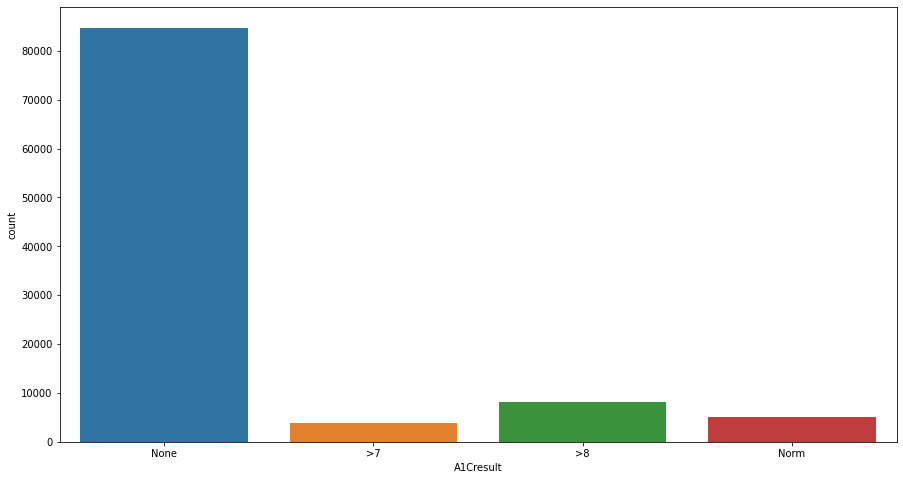

In [120]:
# A1Cresult
data3.A1Cresult.value_counts()
sns.countplot(data3.A1Cresult)

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


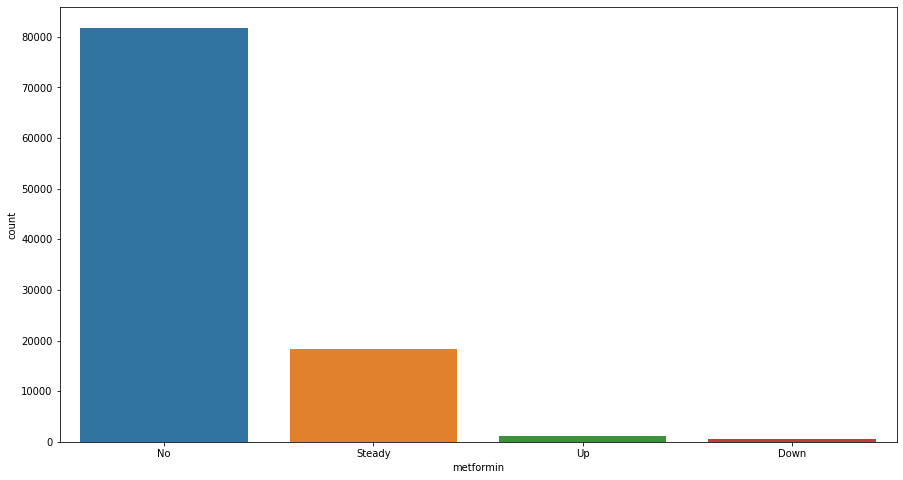

In [121]:
# metformin
print(data3.metformin.value_counts())
sns.countplot(data3.metformin)
plt.show()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


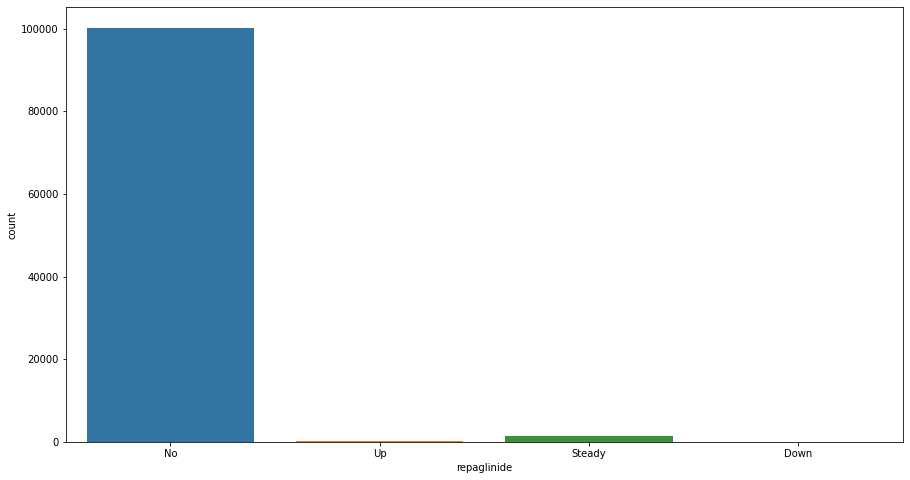

In [122]:
#repaglinide
print(data3.repaglinide.value_counts())
sns.countplot(data3.repaglinide)
plt.show()

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


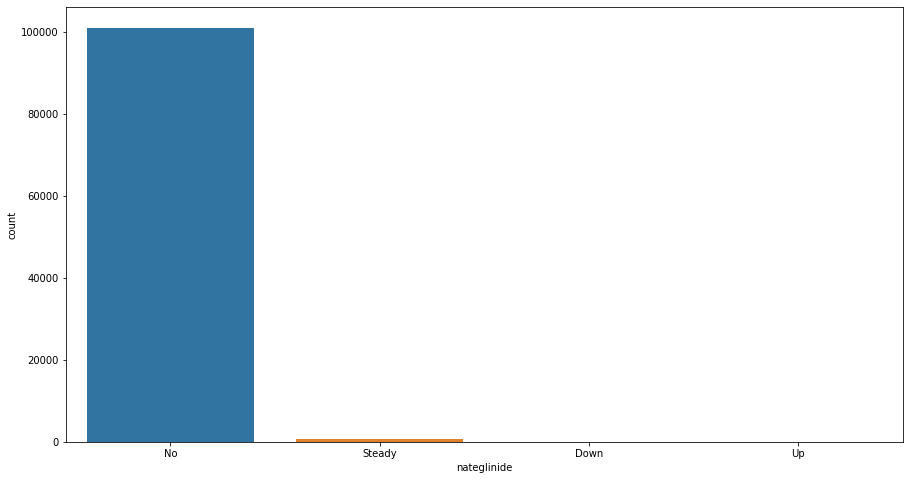

In [123]:
# nateglinide
print(data3.nateglinide.value_counts())
sns.countplot(data3.nateglinide)
plt.show()

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


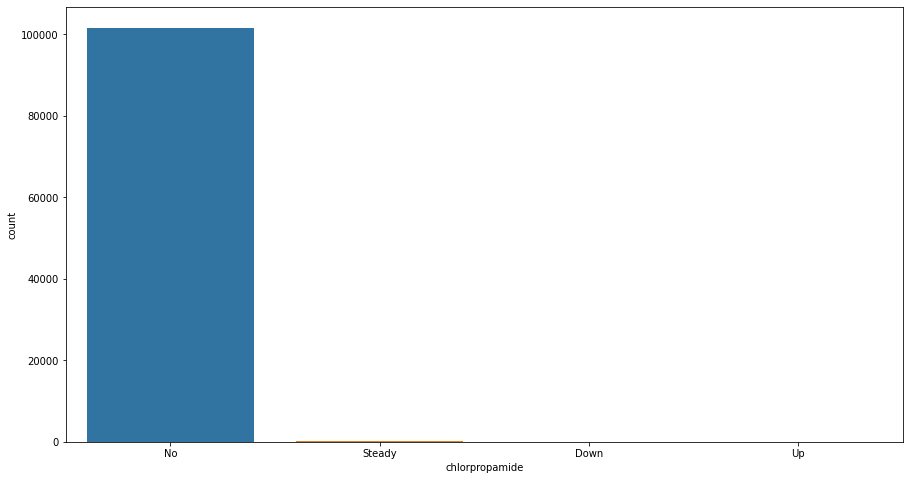

In [124]:
# chlorpropamide
print(data3.chlorpropamide.value_counts())
sns.countplot(data3.chlorpropamide)
plt.show()

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


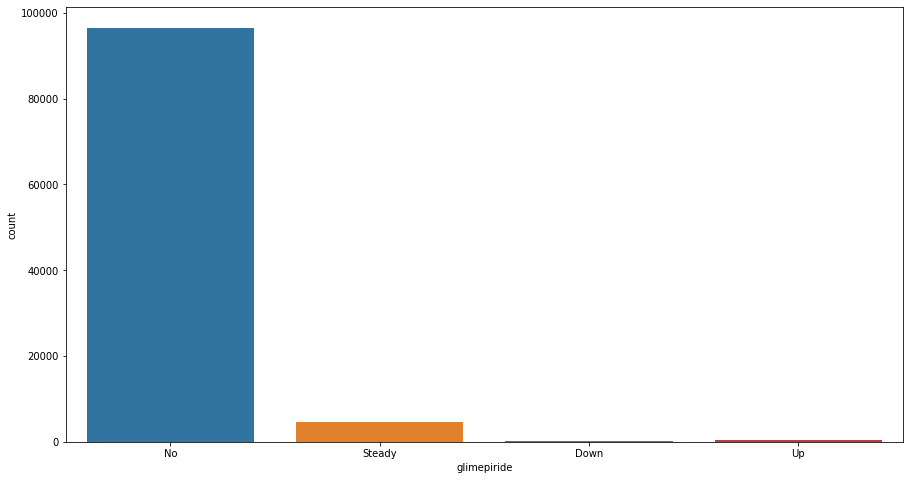

In [125]:
# glimepiride
print(data3.glimepiride.value_counts())
sns.countplot(data3.glimepiride)
plt.show()

No        101765
Steady         1
Name: acetohexamide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


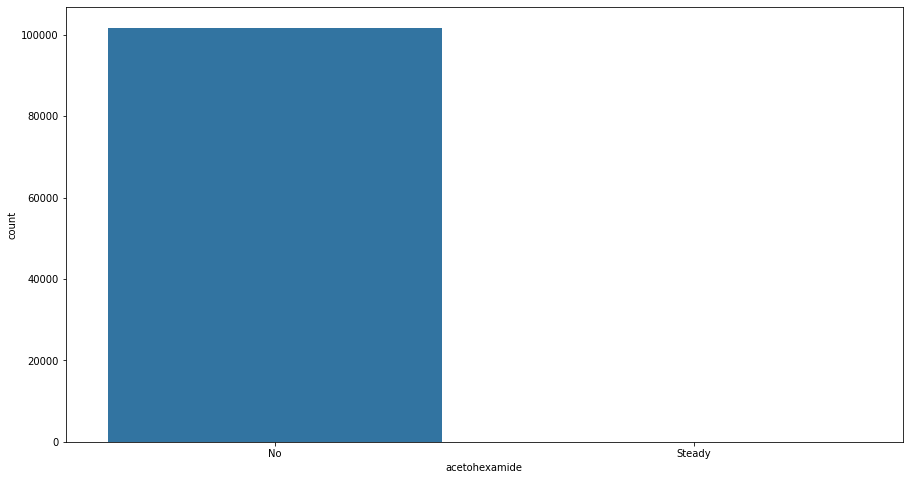

In [126]:
# Acetohexamide - 
print(data4.acetohexamide.value_counts())
sns.countplot(data4.acetohexamide)
plt.show()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


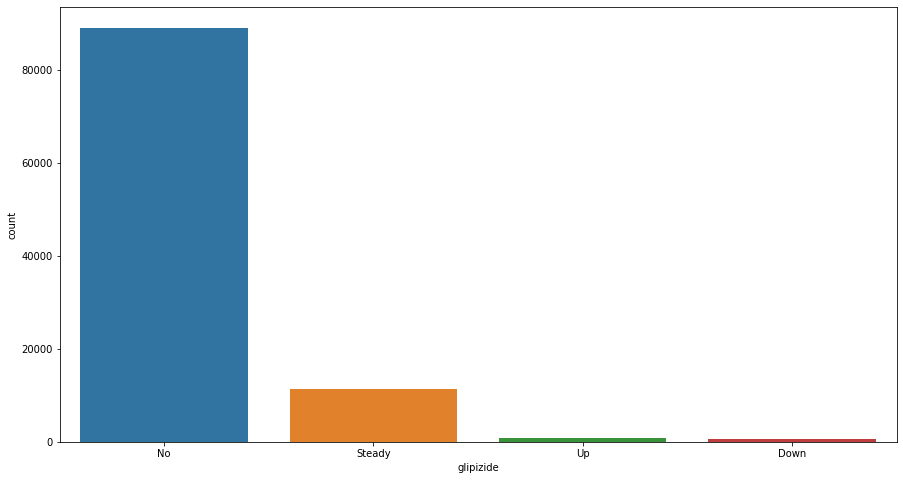

In [127]:
# Glipizide - 
print(data4.glipizide.value_counts())
sns.countplot(data4.glipizide)
plt.show()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


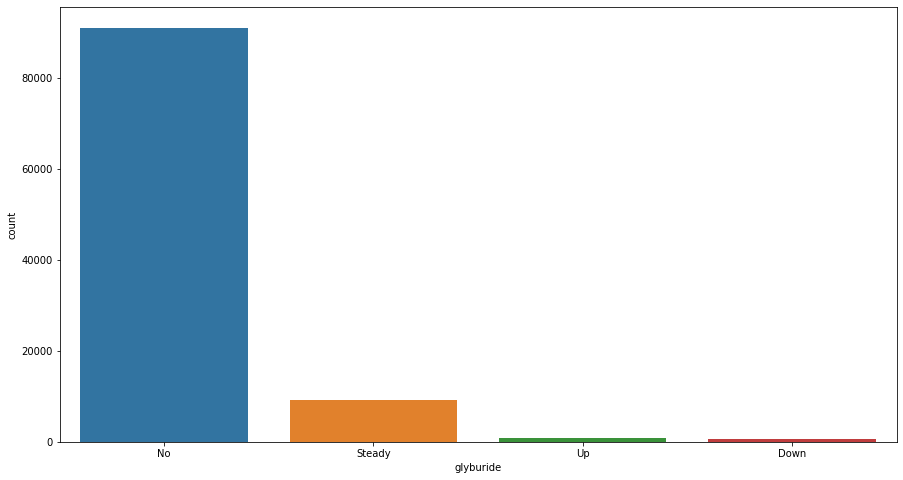

In [128]:
# Glyburide - 
print(data4.glyburide.value_counts())
sns.countplot(data4.glyburide)
plt.show()

No        101743
Steady        23
Name: tolbutamide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


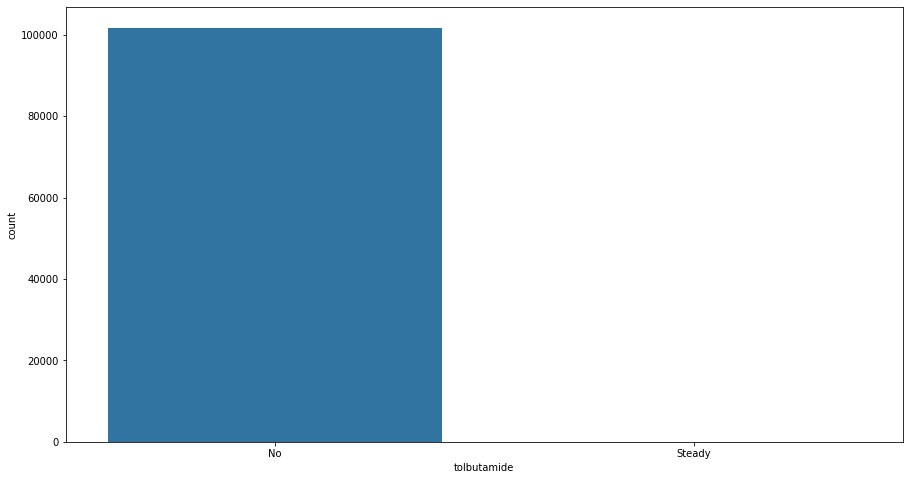

In [129]:
# Tolbutamide - 
print(data4.tolbutamide.value_counts())
sns.countplot(data4.tolbutamide)
plt.show()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


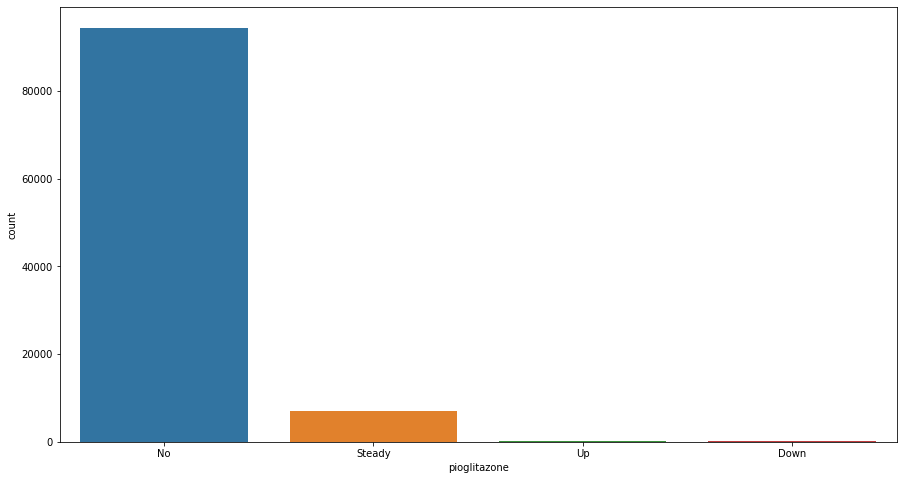

In [130]:
# Pioglitazone - 
print(data4.pioglitazone.value_counts())
sns.countplot(data4.pioglitazone)
plt.show()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


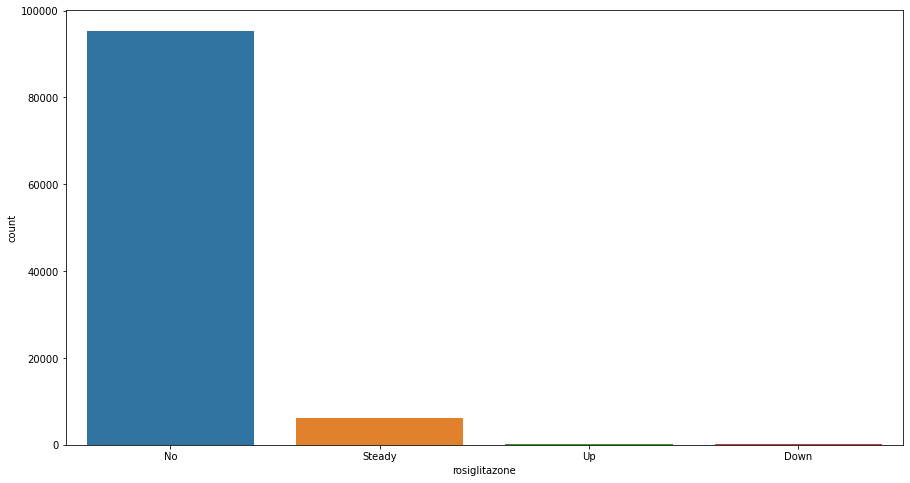

In [131]:
# Rosiglitazone - 
print(data4.rosiglitazone.value_counts())
sns.countplot(data4.rosiglitazone)
plt.show()

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


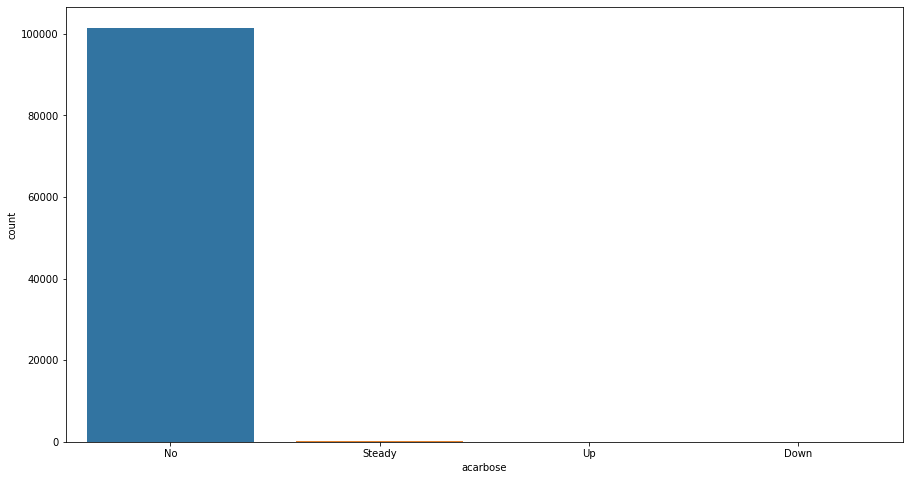

In [132]:
# Acarbose - 
print(data4.acarbose.value_counts())
sns.countplot(data4.acarbose)
plt.show()

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


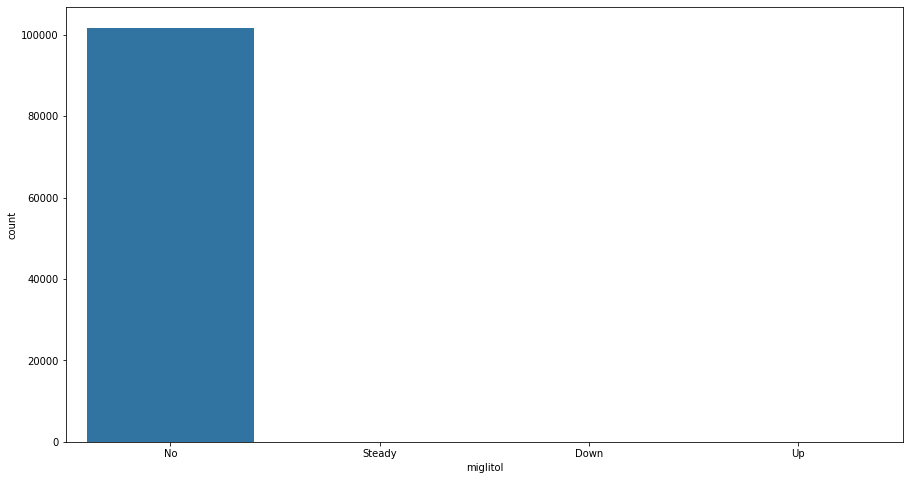

In [133]:
# Miglitol - 
print(data4.miglitol.value_counts())
sns.countplot(data4.miglitol)
plt.show()

No        101763
Steady         3
Name: troglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


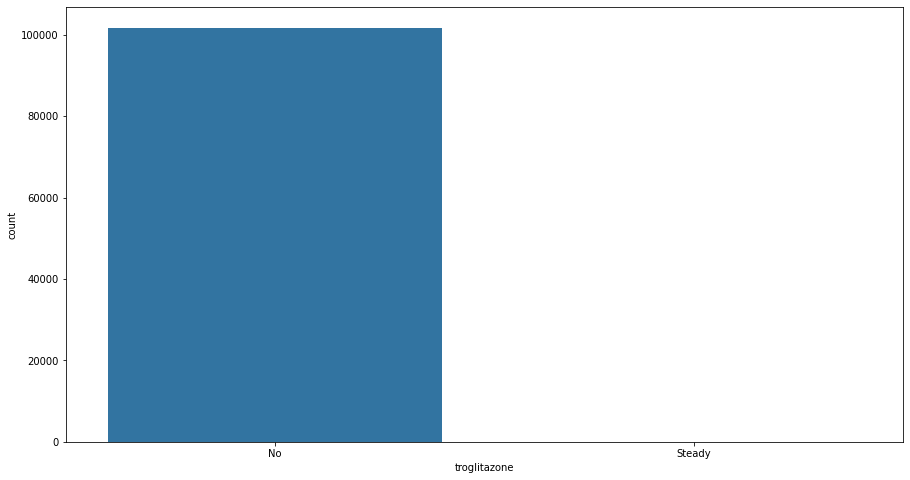

In [134]:
# Troglitazone - 
print(data4.troglitazone.value_counts())
sns.countplot(data4.troglitazone)
plt.show()

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


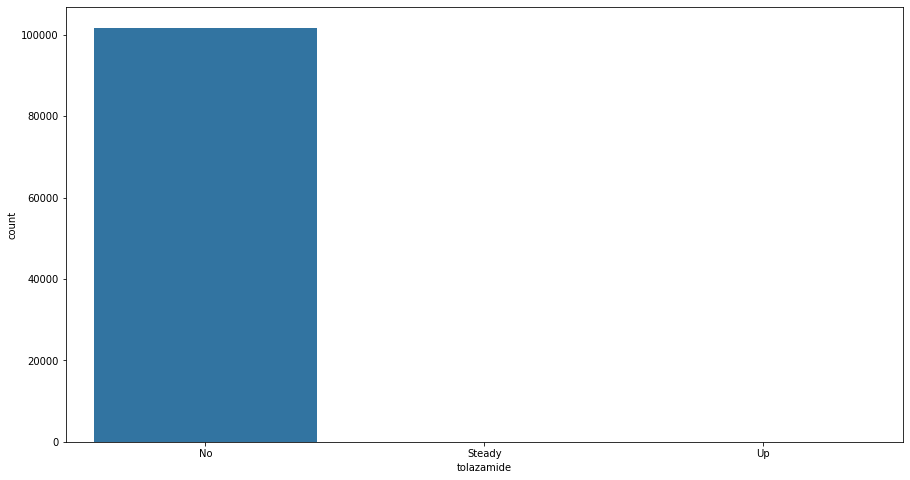

In [135]:
# Tolazamide - 
print(data4.tolazamide.value_counts())
sns.countplot(data4.tolazamide)
plt.show()

No    101766
Name: examide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


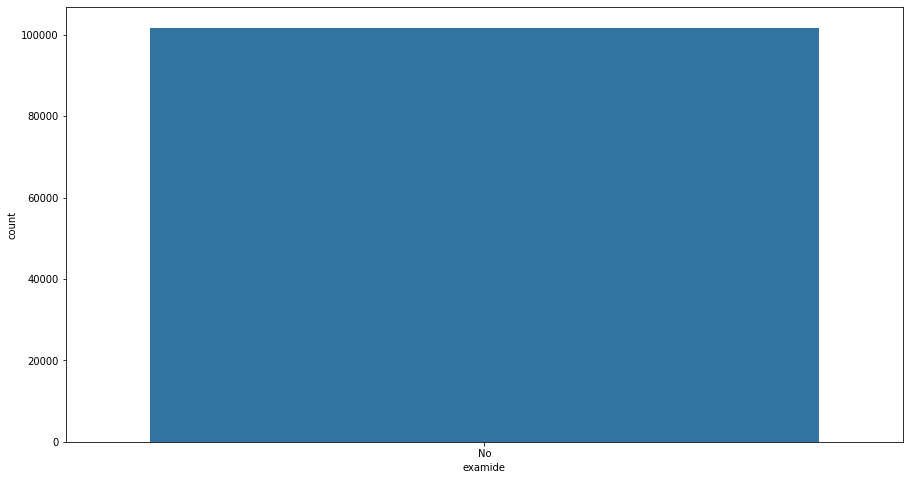

In [136]:
#examide
print(data5.examide.value_counts())
sns.countplot(data5.examide)
plt.show()

No    101766
Name: citoglipton, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


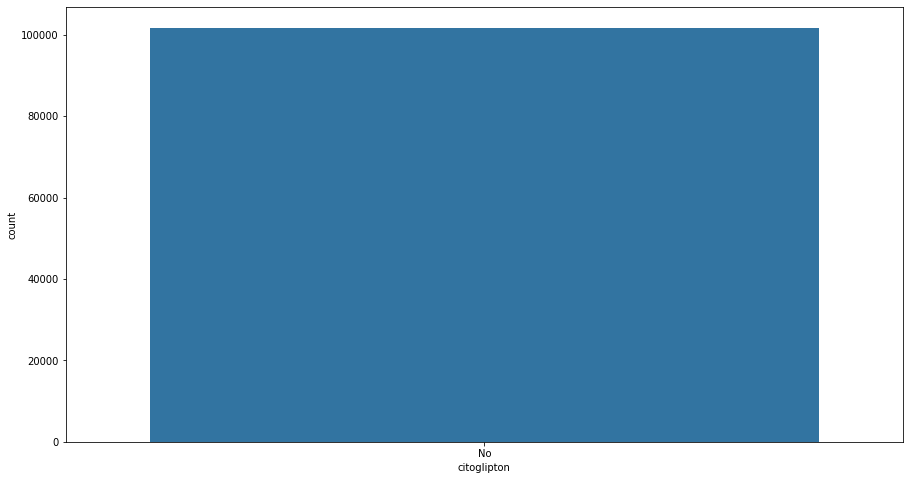

In [137]:
#citoglipton
print(data5.citoglipton.value_counts())
sns.countplot(data5.citoglipton)
plt.show()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


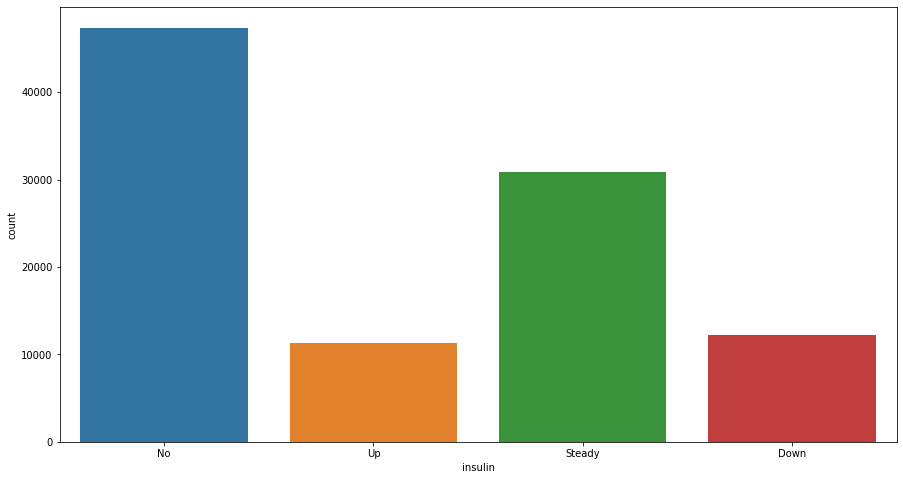

In [138]:
#insulin
print(data5.insulin.value_counts())
sns.countplot(data5.insulin)
plt.show()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


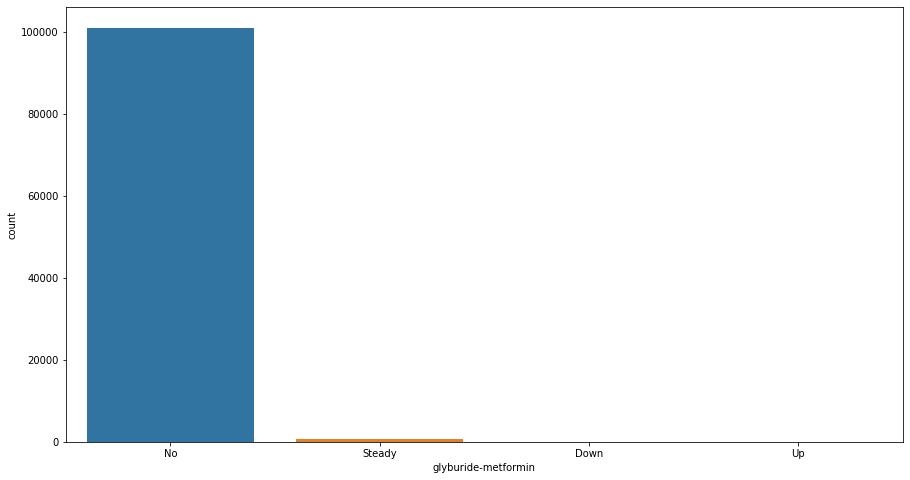

In [139]:
#glyburide-metformin
print(data5['glyburide-metformin'].value_counts())
sns.countplot(data5['glyburide-metformin'])
plt.show()

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


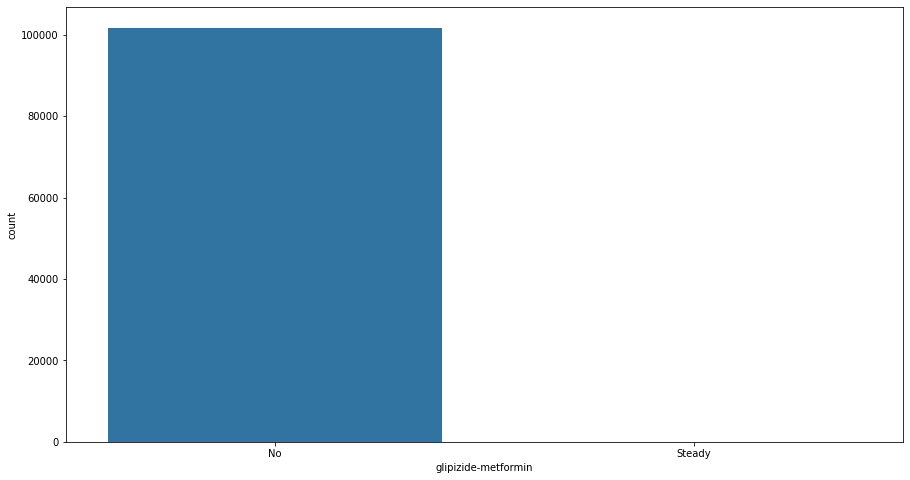

In [140]:
#glipizide-metformin
print(data5['glipizide-metformin'].value_counts())
sns.countplot(data5['glipizide-metformin'])
plt.show()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


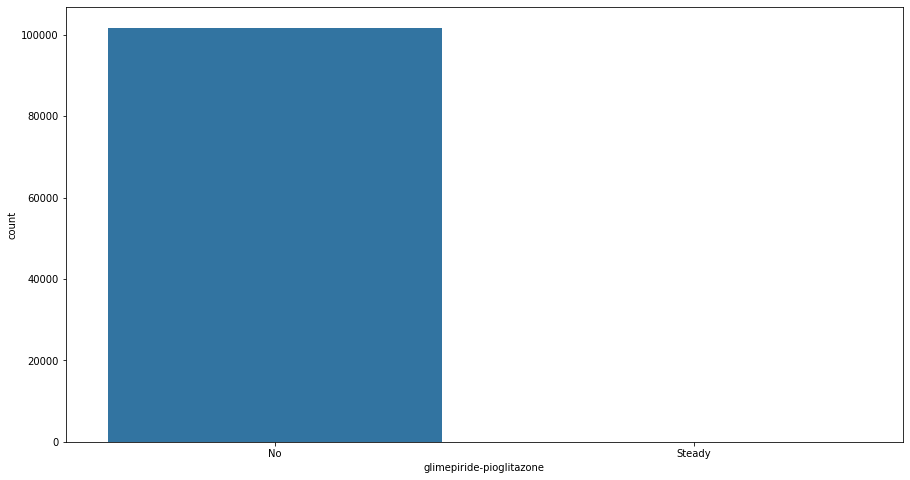

In [141]:
#glimepiride-pioglitazone
print(data5['glimepiride-pioglitazone'].value_counts())
sns.countplot(data5['glimepiride-pioglitazone'])
plt.show()

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


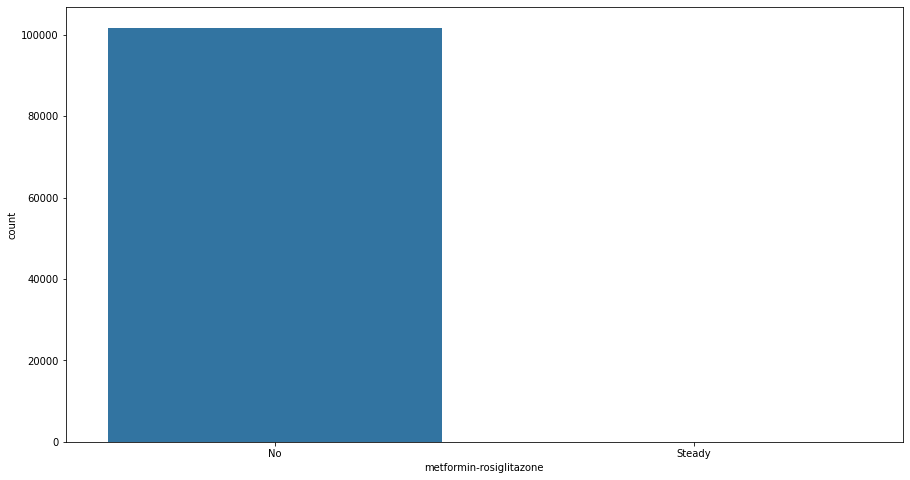

In [142]:
#metformin-rosiglitazone
print(data5['metformin-rosiglitazone'].value_counts())
sns.countplot(data5['metformin-rosiglitazone'])
plt.show()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


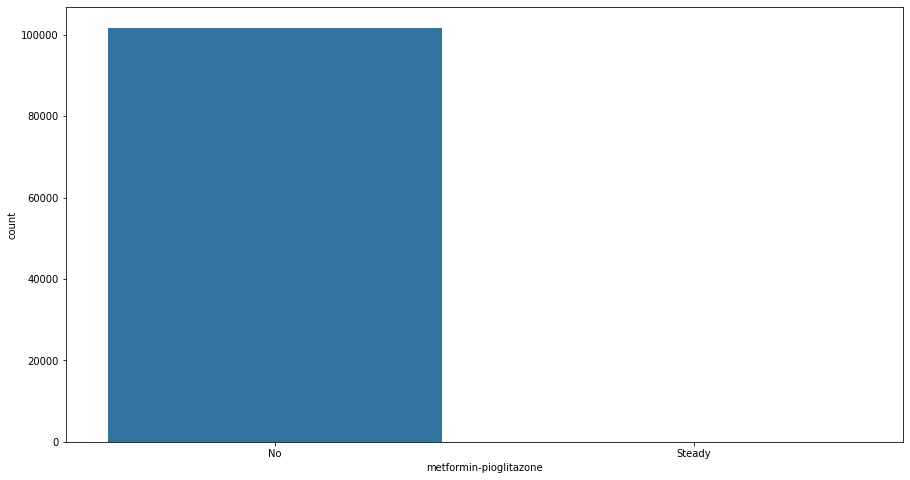

In [143]:
#metformin-pioglitazone
print(data5['metformin-pioglitazone'].value_counts())
sns.countplot(data5['metformin-pioglitazone'])
plt.show()

No    54755
Ch    47011
Name: change, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


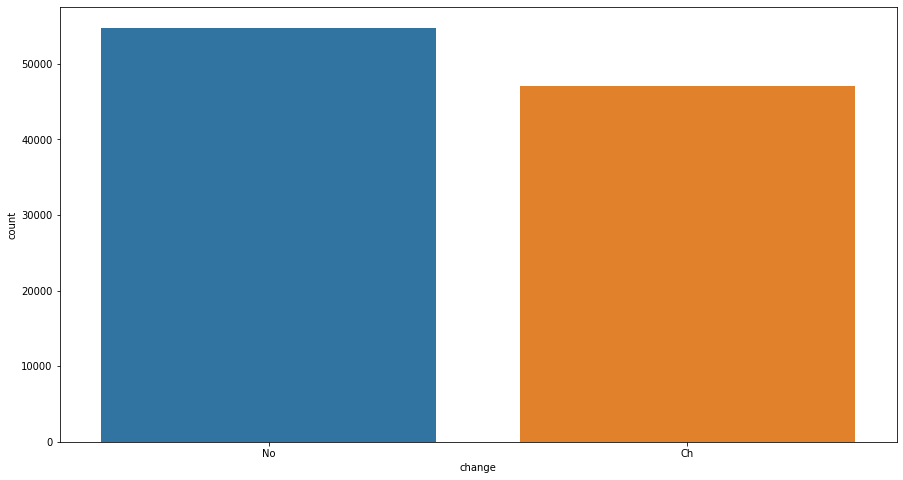

In [144]:
#change
print(data5.change.value_counts())
sns.countplot(data5.change)
plt.show()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


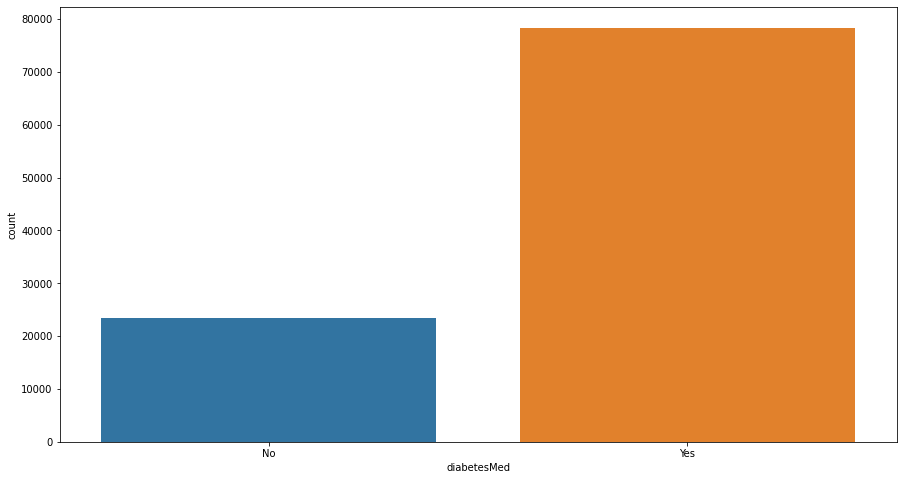

In [145]:
#diabetesMed
print(data5.diabetesMed.value_counts())
sns.countplot(data5.diabetesMed)
plt.show()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


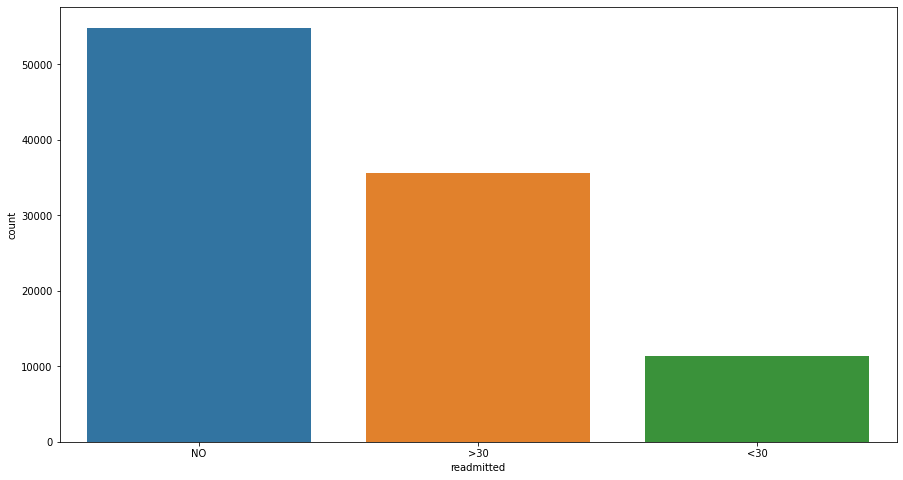

In [146]:
#readmitted
print(data5.readmitted.value_counts())
sns.countplot(data5.readmitted)
plt.show()

# **Bivariate Analysis**

readmitted       <30    >30     NO
max_glu_serum                     
>200             185    530    770
>300             181    521    562
None           10696  33609  52115
Norm             295    885   1417


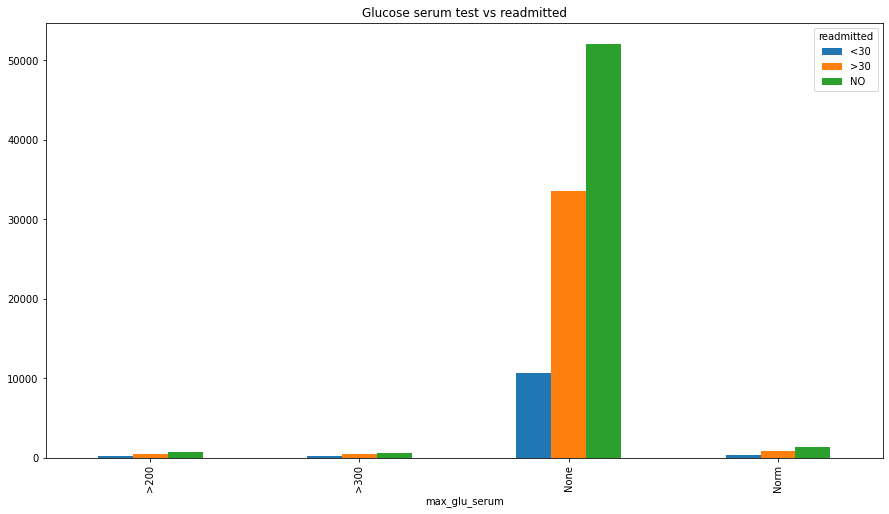

In [147]:
# Glucose serum test
print(pd.crosstab(data3.max_glu_serum,data3.readmitted))
pd.crosstab(data3.max_glu_serum,data3.readmitted).plot(kind='bar')
plt.title('Glucose serum test vs readmitted')
plt.show()

readmitted   <30    >30     NO
A1Cresult                     
>7           383   1300   2129
>8           811   2901   4504
None        9681  29745  45322
Norm         482   1599   2909


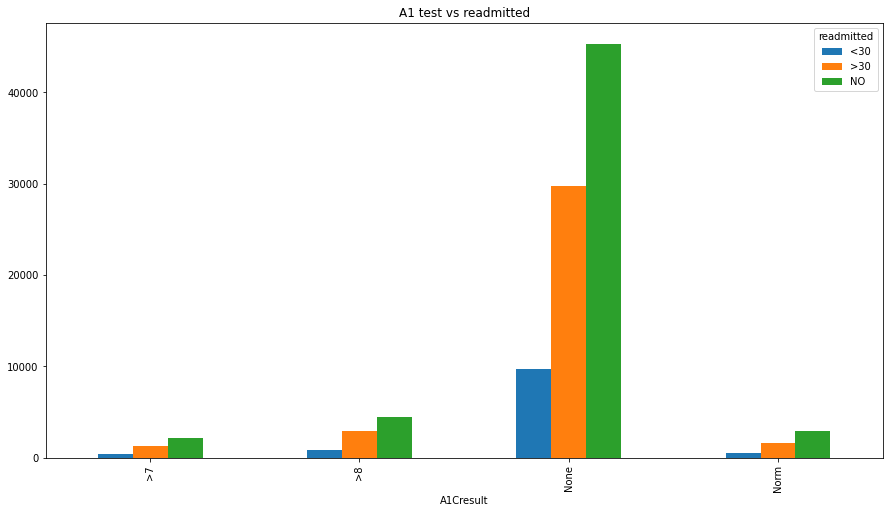

In [148]:
# A1Cresult
print(pd.crosstab(data3.A1Cresult,data3.readmitted))
pd.crosstab(data3.A1Cresult,data3.readmitted).plot(kind='bar')
plt.title('A1 test vs readmitted')
plt.show()

readmitted   <30    >30     NO
metformin                     
Down          69    190    316
No          9418  28839  43521
Steady      1782   6169  10395
Up            88    347    632


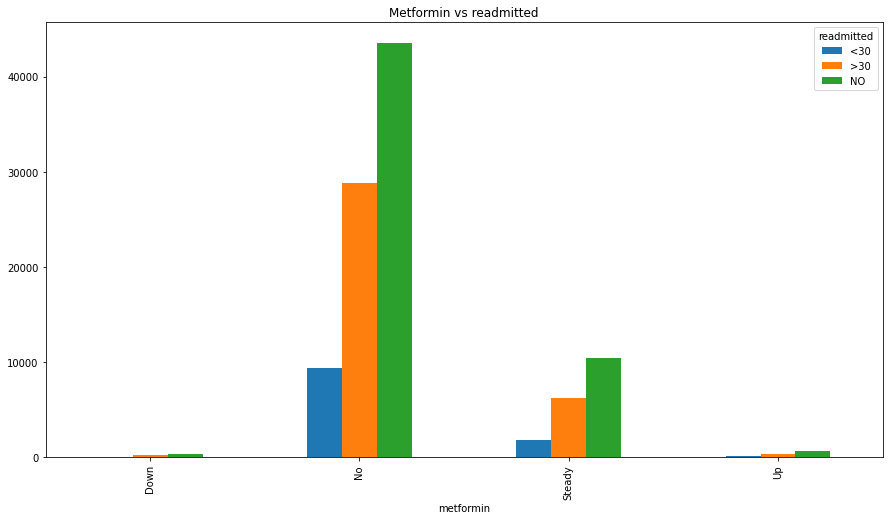

In [149]:
# metformin
print(pd.crosstab(data3.metformin,data3.readmitted))
pd.crosstab(data3.metformin,data3.readmitted).plot(kind='bar')
plt.title('Metformin vs readmitted')
plt.show()

readmitted     <30    >30     NO
repaglinide                     
Down             3     19     23
No           11152  34905  54170
Steady         182    588    614
Up              20     33     57


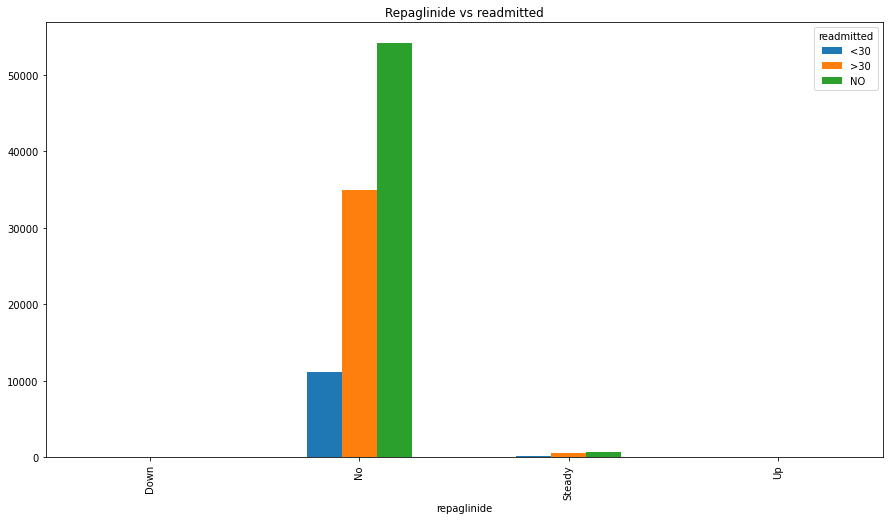

In [150]:
# repaglinide
print(pd.crosstab(data3.repaglinide,data3.readmitted))
pd.crosstab(data3.repaglinide,data3.readmitted).plot(kind='bar')
plt.title('Repaglinide vs readmitted')
plt.show()

readmitted     <30    >30     NO
nateglinide                     
Down             1      4      6
No           11277  35283  54503
Steady          78    248    342
Up               1     10     13


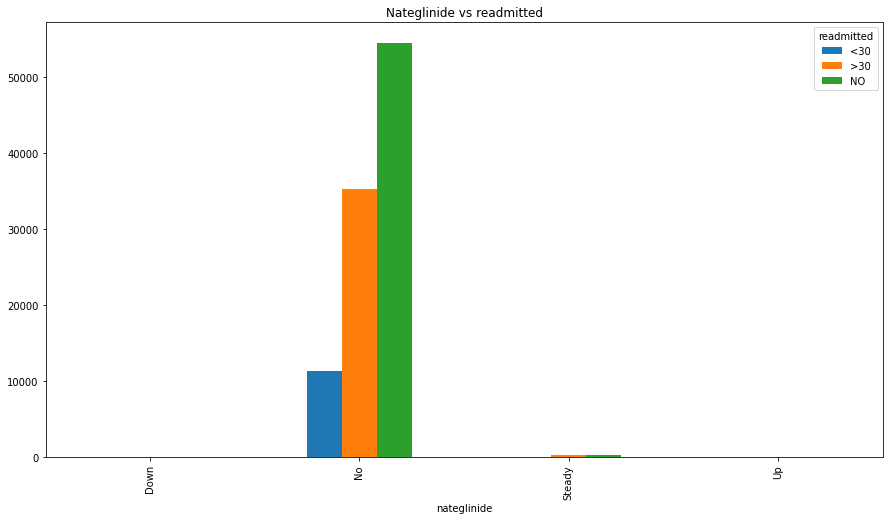

In [151]:
# nateglinide
print(pd.crosstab(data3.nateglinide,data3.readmitted))
pd.crosstab(data3.nateglinide,data3.readmitted).plot(kind='bar')
plt.title('Nateglinide vs readmitted')
plt.show()

readmitted        <30    >30     NO
chlorpropamide                     
Down                0      0      1
No              11352  35511  54817
Steady              5     29     45
Up                  0      5      1


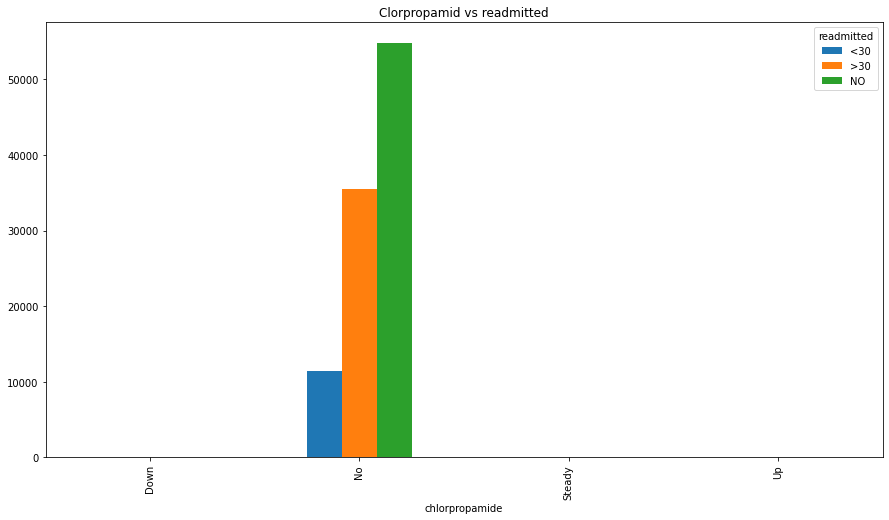

In [152]:
# chlorpropamide
print(pd.crosstab(data3.chlorpropamide,data3.readmitted))
pd.crosstab(data3.chlorpropamide,data3.readmitted).plot(kind='bar')
plt.title('Clorpropamid vs readmitted')
plt.show()

readmitted     <30    >30     NO
glimepiride                     
Down            25     68    101
No           10827  33638  52110
Steady         468   1737   2465
Up              37    102    188


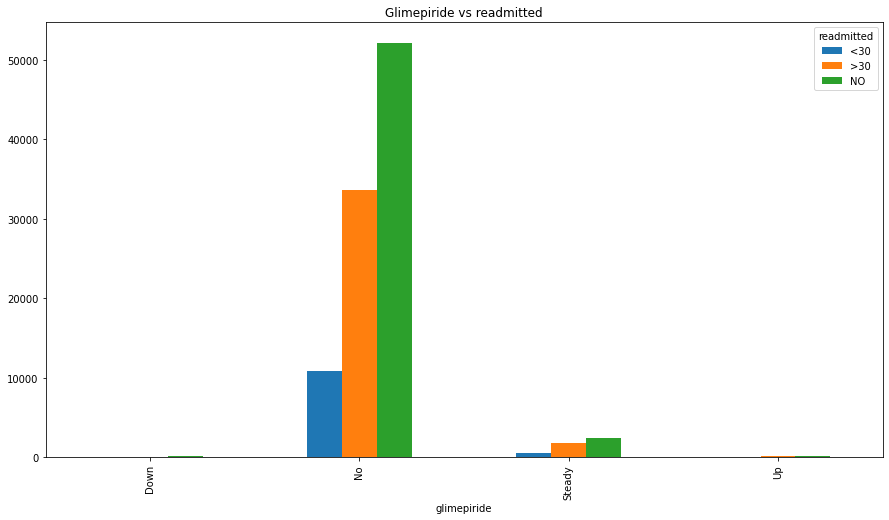

In [153]:
# glimepiride
print(pd.crosstab(data3.glimepiride,data3.readmitted))
pd.crosstab(data3.glimepiride,data3.readmitted).plot(kind='bar')
plt.title('Glimepiride vs readmitted')
plt.show()

readmitted       <30    >30     NO
acetohexamide                     
No             11357  35544  54864
Steady             0      1      0


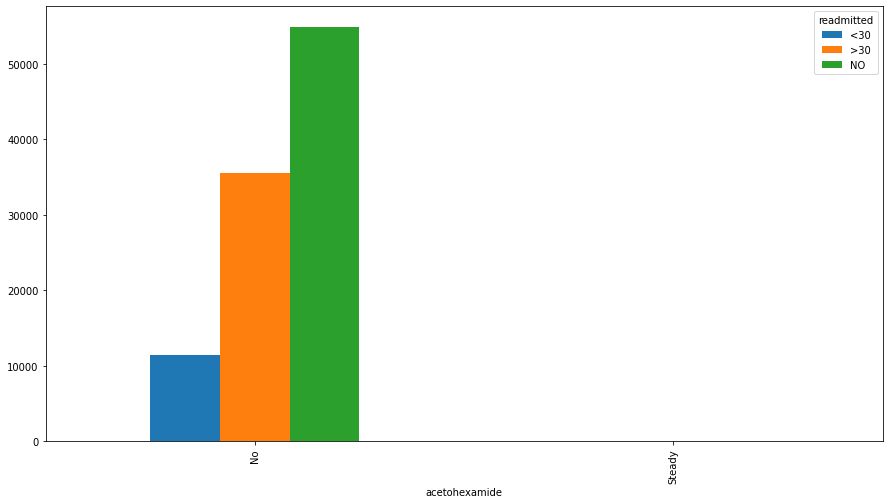

In [154]:
# Acetohexamide - 
print(pd.crosstab(data4.acetohexamide,data4.readmitted))
pd.crosstab(data4.acetohexamide,data4.readmitted).plot(kind='bar')
plt.show()

readmitted   <30    >30     NO
glipizide                     
Down          85    211    264
No          9905  30815  48360
Steady      1268   4233   5855
Up            99    286    385


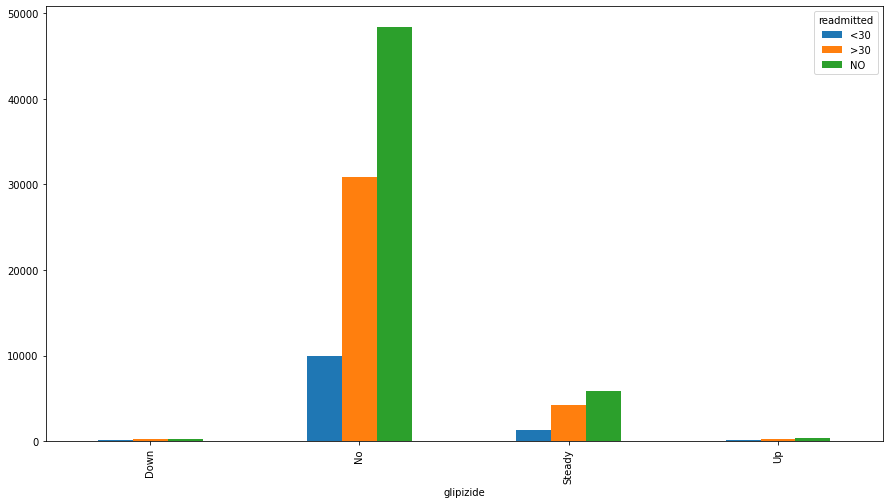

In [155]:
# Glipizide - 
print(pd.crosstab(data4.glipizide,data4.readmitted))
pd.crosstab(data4.glipizide,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
glyburide                      
Down           52    223    289
No          10225  31827  49064
Steady        995   3221   5058
Up             85    274    453


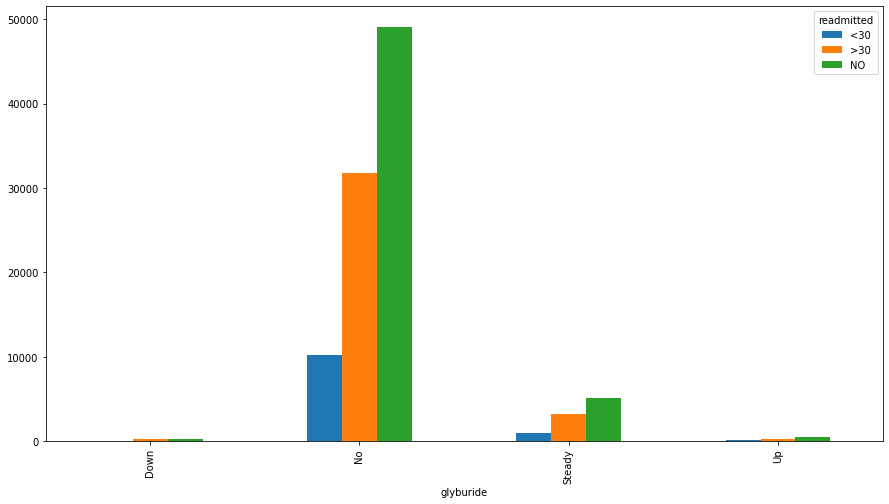

In [156]:
# Glyburide - 
print(pd.crosstab(data4.glyburide,data4.readmitted))
pd.crosstab(data4.glyburide,data4.readmitted).plot(kind='bar')
plt.show()

readmitted     <30    >30     NO
tolbutamide                     
No           11356  35538  54849
Steady           1      7     15


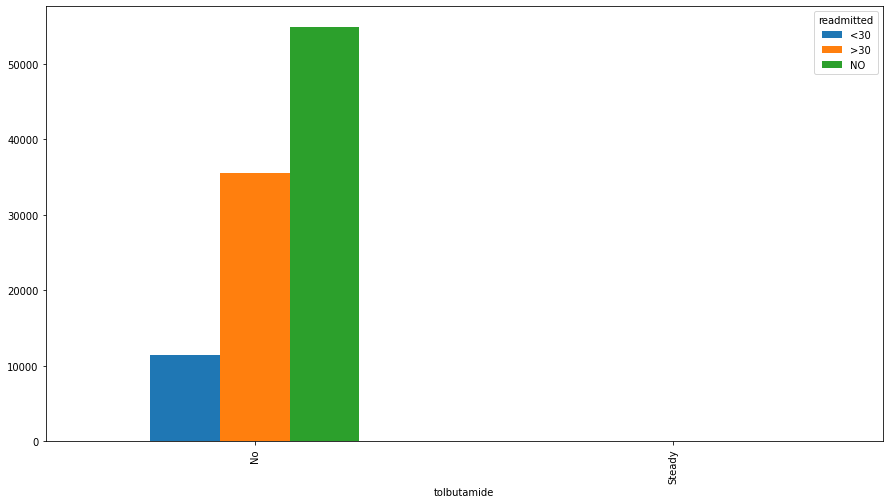

In [157]:
# Tolbutamide - 
print(pd.crosstab(data4.tolbutamide,data4.readmitted))
pd.crosstab(data4.tolbutamide,data4.readmitted).plot(kind='bar')
plt.show()

readmitted      <30    >30     NO
pioglitazone                     
Down             18     45     55
No            10583  32788  51067
Steady          727   2620   3629
Up               29     92    113


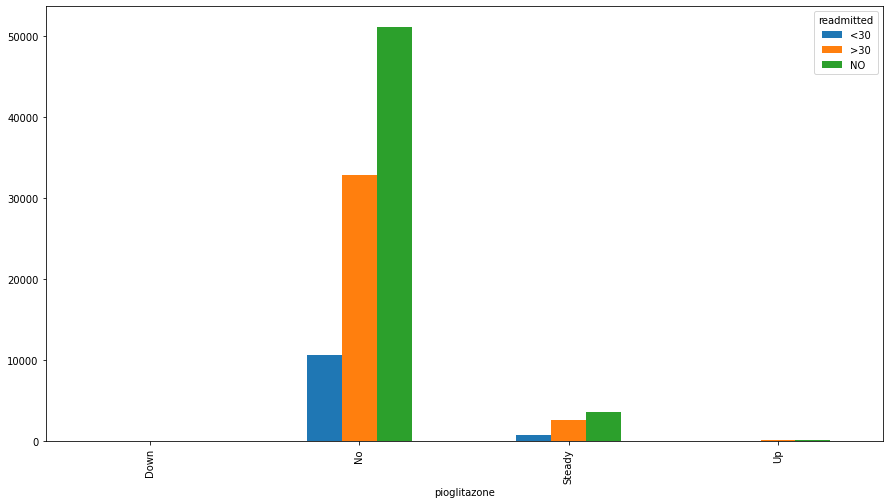

In [158]:
# Pioglitazone - 
print(pd.crosstab(data4.pioglitazone,data4.readmitted))
pd.crosstab(data4.pioglitazone,data4.readmitted).plot(kind='bar')
plt.show()

readmitted       <30    >30     NO
rosiglitazone                     
Down               5     22     60
No             10692  33136  51573
Steady           641   2335   3124
Up                19     52    107


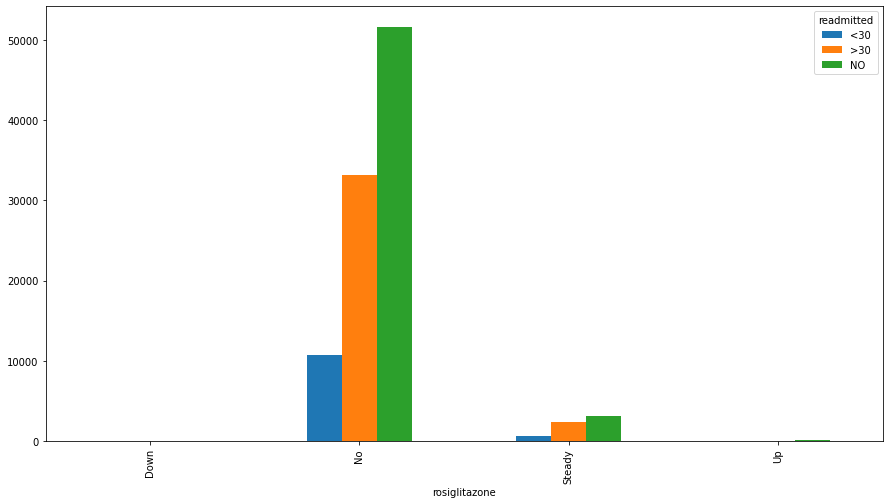

In [159]:
# Rosiglitazone - 
print(pd.crosstab(data4.rosiglitazone,data4.readmitted))
pd.crosstab(data4.rosiglitazone,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
acarbose                       
Down            1      1      1
No          11329  35390  54739
Steady         25    150    120
Up              2      4      4


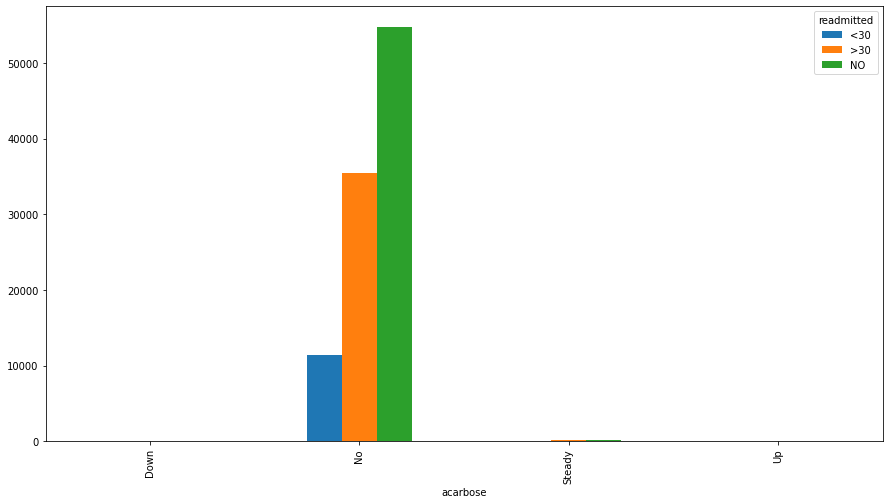

In [160]:
# Acarbose - 
print(pd.crosstab(data4.acarbose,data4.readmitted))
pd.crosstab(data4.acarbose,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
miglitol                       
Down            2      3      0
No          11353  35525  54850
Steady          2     16     13
Up              0      1      1


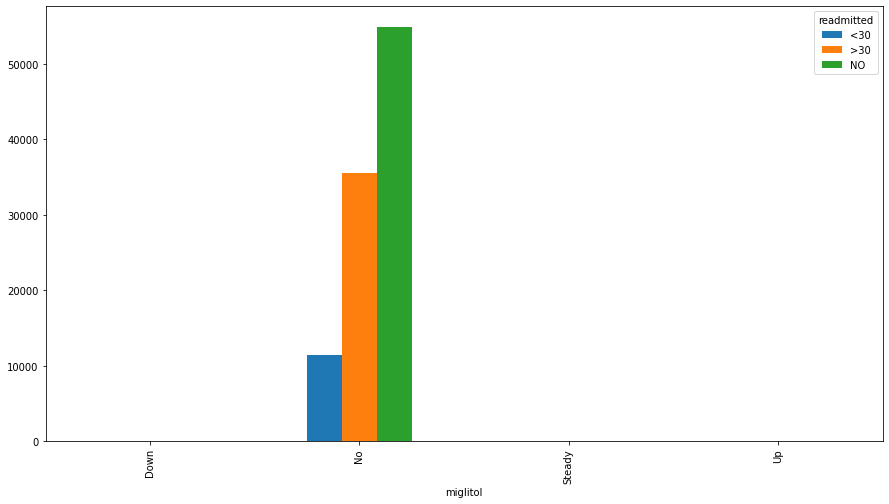

In [161]:
# Miglitol - 
print(pd.crosstab(data4.miglitol,data4.readmitted))
pd.crosstab(data4.miglitol,data4.readmitted).plot(kind='bar')
plt.show()

readmitted      <30    >30     NO
troglitazone                     
No            11357  35543  54863
Steady            0      2      1


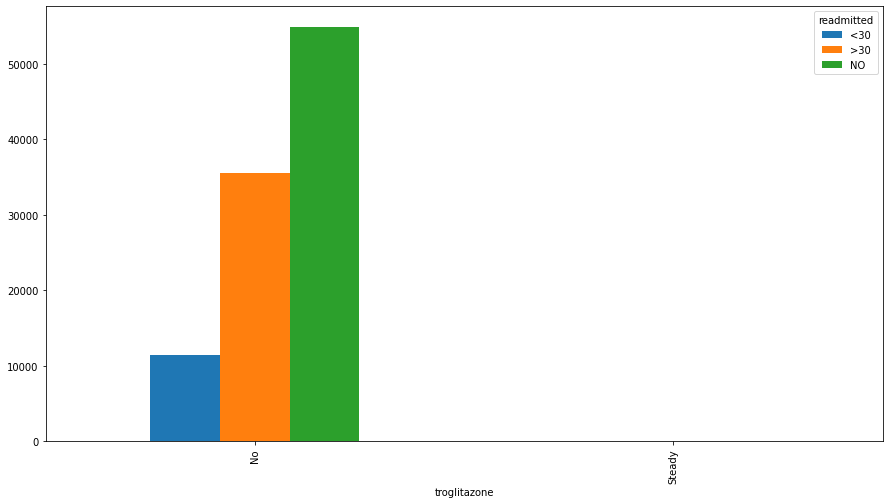

In [162]:
# Troglitazone - 
print(pd.crosstab(data4.troglitazone,data4.readmitted))
pd.crosstab(data4.troglitazone,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
tolazamide                     
No          11354  35535  54838
Steady          3      9     26
Up              0      1      0


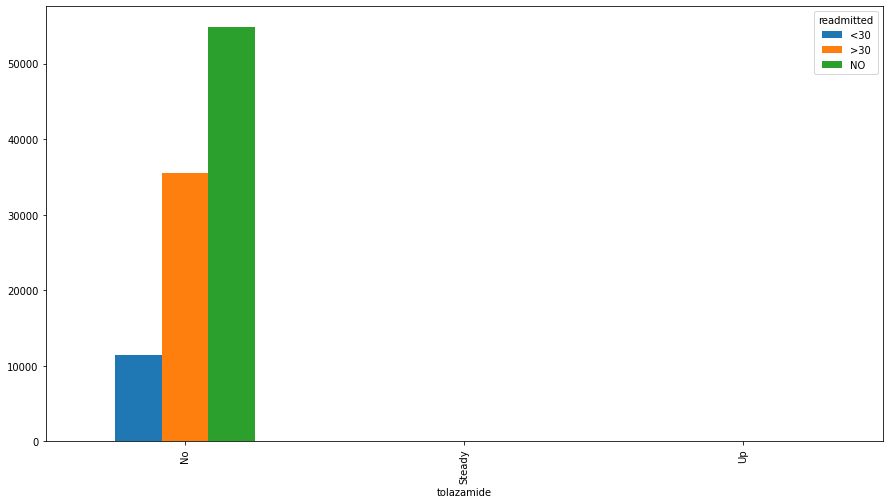

In [163]:
# Tolazamide - 
print(pd.crosstab(data4.tolazamide,data4.readmitted))
pd.crosstab(data4.tolazamide,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
examide                        
No          11357  35545  54864


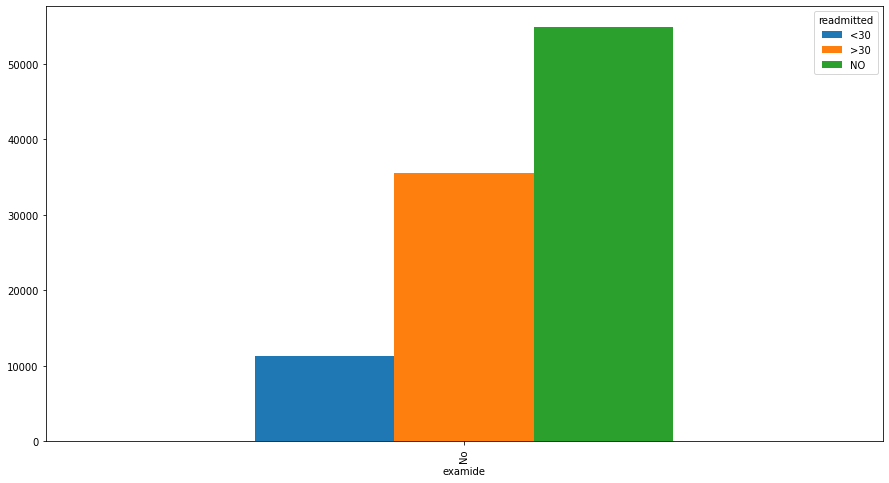

In [164]:
#examide
print(pd.crosstab(data5.examide,data5.readmitted))
pd.crosstab(data5.examide,data5.readmitted).plot(kind='bar')
plt.show()

readmitted     <30    >30     NO
citoglipton                     
No           11357  35545  54864


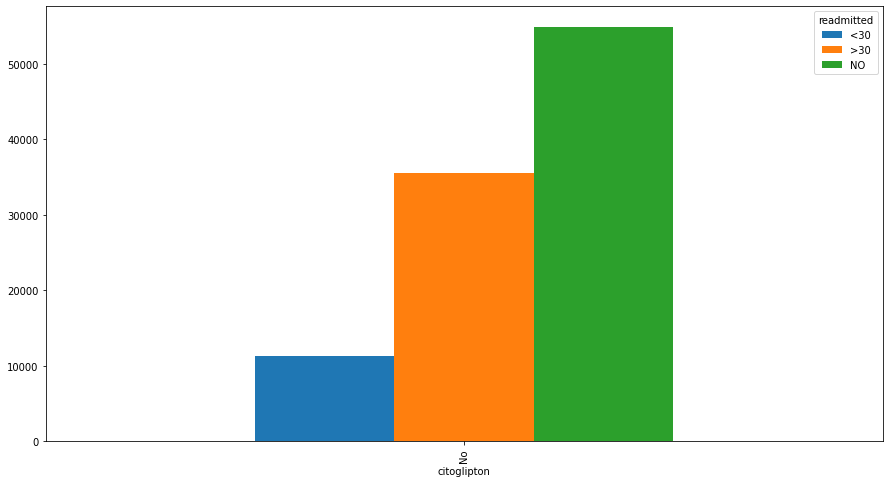

In [165]:
#citoglipton
print(pd.crosstab(data5.citoglipton,data5.readmitted))
pd.crosstab(data5.citoglipton,data5.readmitted).plot(kind='bar')
plt.show()

readmitted   <30    >30     NO
insulin                       
Down        1698   4752   5768
No          4756  15949  26678
Steady      3433  10482  16934
Up          1470   4362   5484


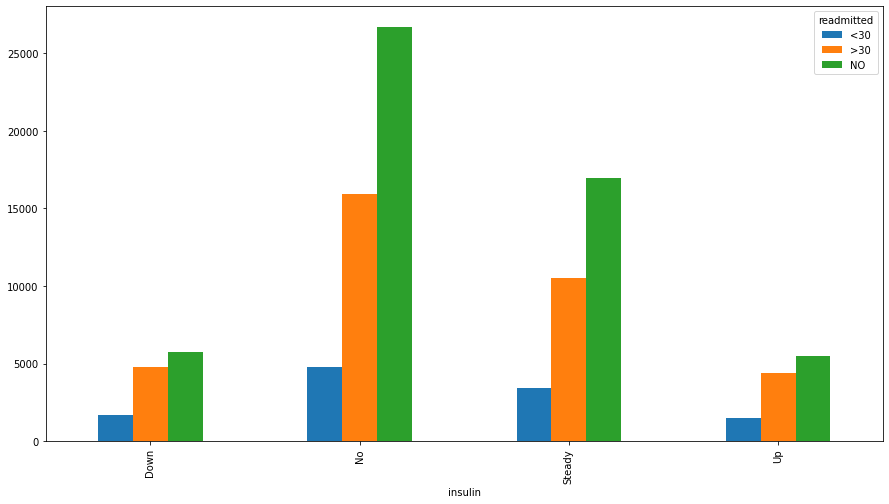

In [166]:
#insulin
print(pd.crosstab(data5.insulin,data5.readmitted))
pd.crosstab(data5.insulin,data5.readmitted).plot(kind='bar')
plt.show()

readmitted             <30    >30     NO
glyburide-metformin                     
Down                     1      0      5
No                   11279  35287  54494
Steady                  77    257    358
Up                       0      1      7


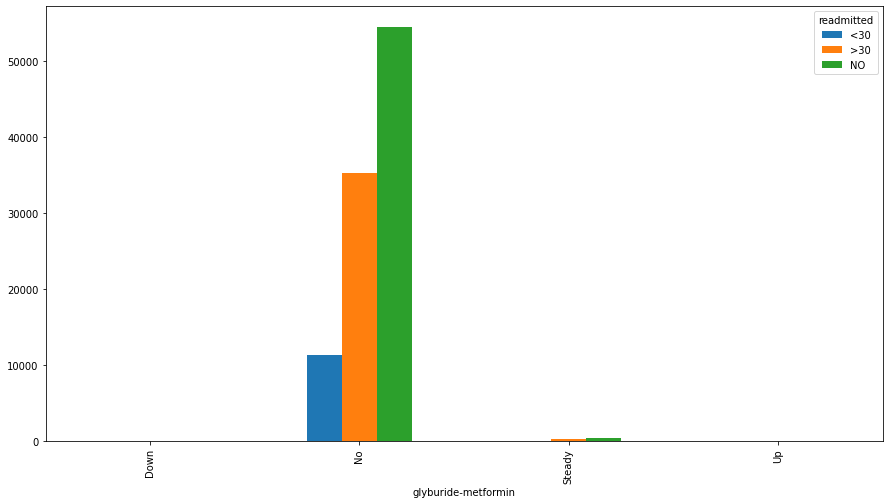

In [167]:
#glyburide-metformin
print(pd.crosstab(data5['glyburide-metformin'],data5.readmitted))
pd.crosstab(data5['glyburide-metformin'],data5.readmitted).plot(kind='bar')
plt.show()

readmitted             <30    >30     NO
glipizide-metformin                     
No                   11356  35538  54859
Steady                   1      7      5


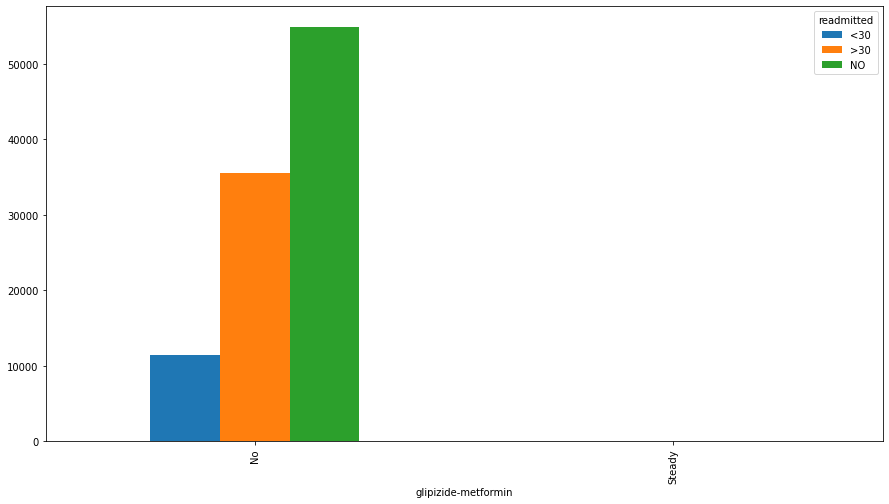

In [168]:
#glipizide-metformin
print(pd.crosstab(data5['glipizide-metformin'],data5.readmitted))
pd.crosstab(data5['glipizide-metformin'],data5.readmitted).plot(kind='bar')
plt.show()

readmitted                  <30    >30     NO
glimepiride-pioglitazone                     
No                        11357  35544  54864
Steady                        0      1      0


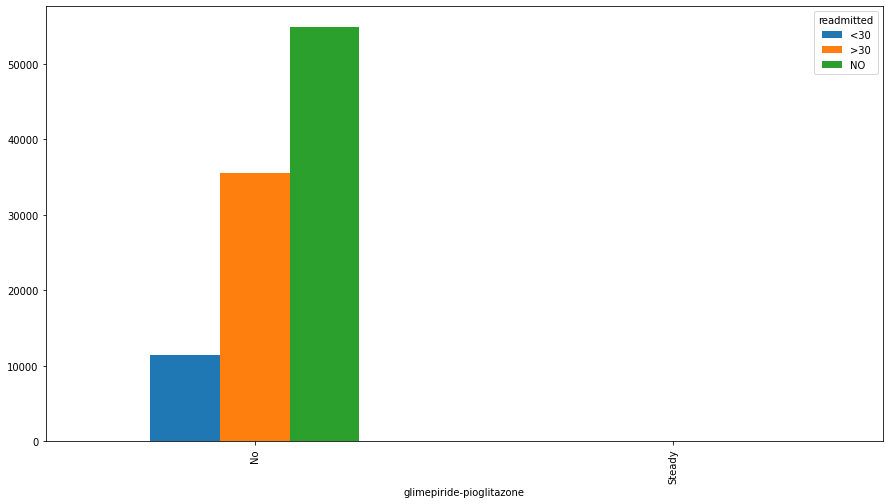

In [169]:
#glimepiride-pioglitazone
print(pd.crosstab(data5['glimepiride-pioglitazone'],data5.readmitted))
pd.crosstab(data5['glimepiride-pioglitazone'],data5.readmitted).plot(kind='bar')
plt.show()

readmitted                 <30    >30     NO
metformin-rosiglitazone                     
No                       11357  35545  54862
Steady                       0      0      2


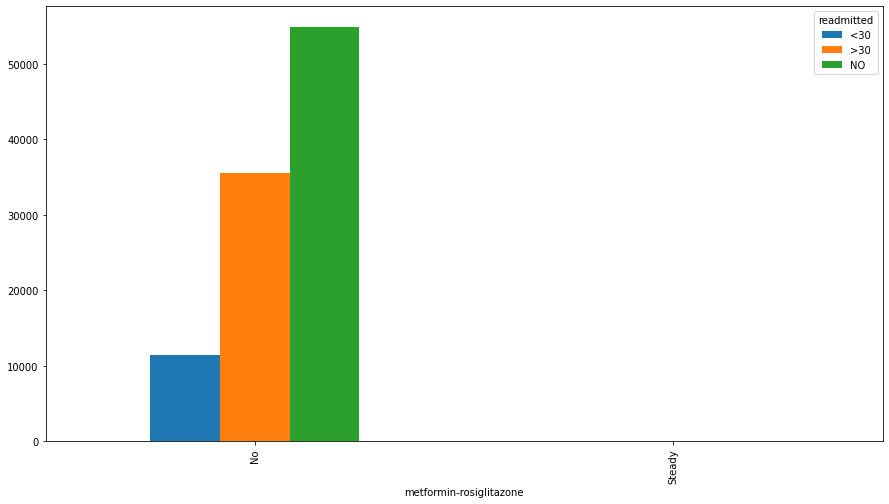

In [170]:
#metformin-rosiglitazone
print(pd.crosstab(data5['metformin-rosiglitazone'],data5.readmitted))
pd.crosstab(data5['metformin-rosiglitazone'],data5.readmitted).plot(kind='bar')
plt.show()

readmitted                <30    >30     NO
metformin-pioglitazone                     
No                      11357  35545  54863
Steady                      0      0      1


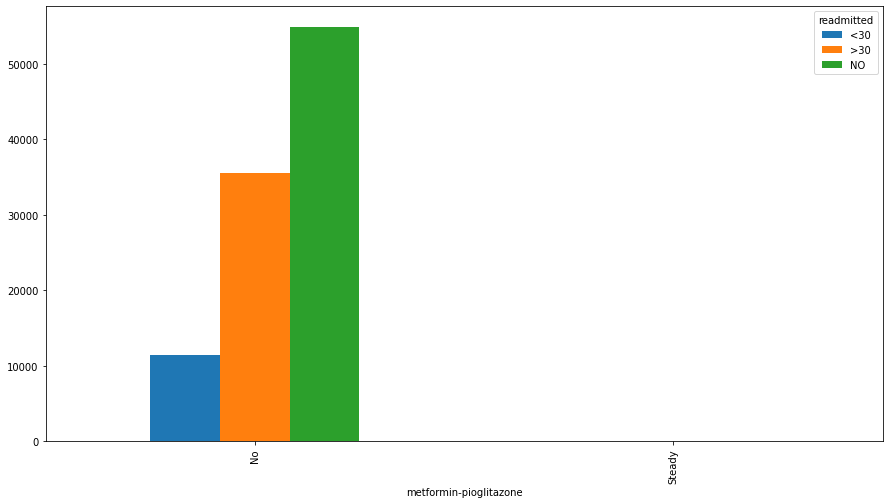

In [171]:
#metformin-pioglitazone
print(pd.crosstab(data5['metformin-pioglitazone'],data5.readmitted))
pd.crosstab(data5['metformin-pioglitazone'],data5.readmitted).plot(kind='bar')
plt.show()

readmitted   <30    >30     NO
change                        
Ch          5558  17272  24181
No          5799  18273  30683


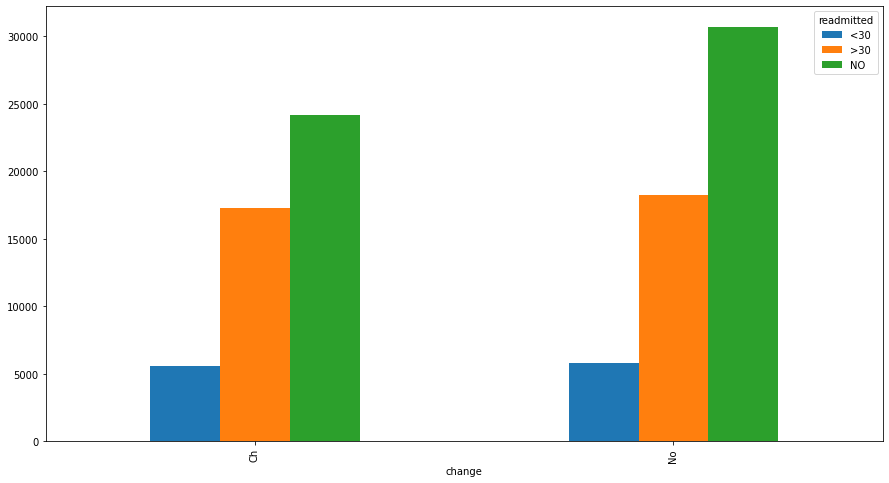

In [172]:
#change
print(pd.crosstab(data5.change,data5.readmitted))
pd.crosstab(data5.change,data5.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
diabetesMed                    
No           2246   7227  13930
Yes          9111  28318  40934


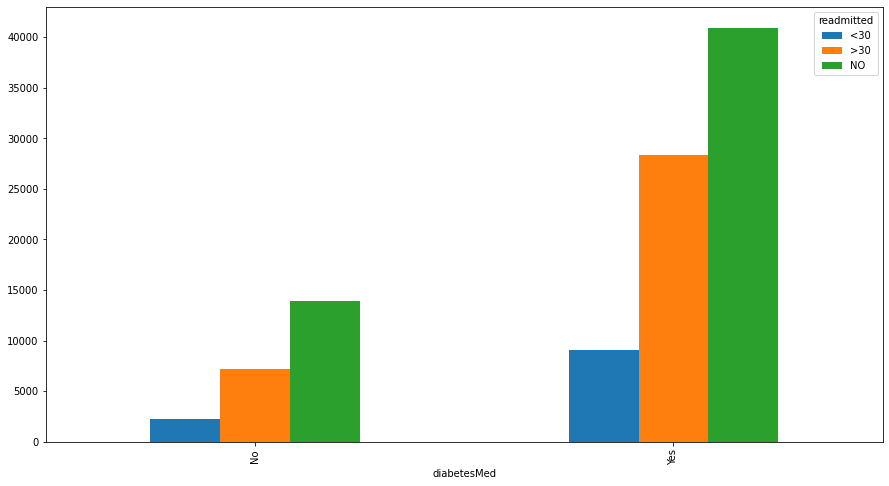

In [173]:
#diabetesMed
print(pd.crosstab(data5.diabetesMed,data5.readmitted))
pd.crosstab(data5.diabetesMed,data5.readmitted).plot(kind='bar')
plt.show()